In [1]:
# takes 25m for 3m records. Creates acbl_hand_records_dd_nwse_augmented.pkl.

# todo:
# double check that acbl_hand_records_dd_nwse_experiments.pkl contains swapped E-W.
# acbl_hand_records.pkl are incorrect due to legacy ignoring of vul. Clean here or correct sql in previous step? 
# board_record_string has replaced '10' with 'T'. This is confusing as it doesn't match sql. Needed?

# next steps:
# acbl_hand_records_evaluation_experiments.ipynb creates acbl_hand_records_evaluated.pkl
# merge-hand-records.ipynb merges acbl and tcg standardized hand records?

# previous steps:
# acbl_hand_records_dd_experiments.ipynb creates acbl_hand_records_dd.pkl

# Requirements
# https://github.com/Afwas/python-dds with some of my mods.
# If pickle errors: pip install --upgrade pandas

In [2]:
import pandas as pd
import pathlib
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.display import display # needed to define display() method in vscode
import sys

In [3]:
sys.path.append(str(pathlib.Path.cwd().parent.joinpath('mlBridgeLib')))
sys.path
import mlBridgeLib

In [4]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [5]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')

In [6]:
# takes 1m
acbl_hand_records_dd_filename = 'acbl_hand_records_dd.pkl'
acbl_hand_records_dd_file = acblPath.joinpath(acbl_hand_records_dd_filename)
stdhrs = pd.read_pickle(acbl_hand_records_dd_file)
display(len(stdhrs),stdhrs)

3355150

ref hand_record_id  event_id Board  EventBoard Dealer   Vul                                                   board_record_string                                                                                         Hands                                                                Par                                                           Par_nwse                                                                         DDmakes                                                                    DDmakes_nwse  DD_N_C  DD_N_D  DD_N_H  DD_N_S  DD_N_N  DD_E_C  DD_E_D  DD_E_H  DD_E_S  DD_E_N  DD_S_C  DD_S_D  DD_S_H  DD_S_S  DD_S_N  DD_W_C  DD_W_D  DD_W_H  DD_W_S  DD_W_N                                                                                            Hands_Bin                                                    HB_N                                                    HB_E                                                    HB_S                                                    HB_W                                                                               HCP  HCP_N  HCP_N_S  HCP_N_H  HCP_N_D  HCP_N_C  HCP_E  HCP_E_S  HCP_E_H  HCP_E_D  HCP_E_C  HCP_S  HCP_S_S  HCP_S_H  HCP_S_D  HCP_S_C  HCP_W  HCP_W_S  HCP_W_H  HCP_W_D  HCP_W_C                                                                                                   QT  ...  CT_NS_H  CT_NS_S  CT_NS_N  CT_EW_C  CT_EW_D  CT_EW_H  CT_EW_S  CT_EW_N  CT_NS_C_Pass  CT_NS_C_Partial  CT_NS_C_Game  CT_NS_C_SSlam  CT_NS_C_GSlam  CT_NS_D_Pass  CT_NS_D_Partial  CT_NS_D_Game  CT_NS_D_SSlam  CT_NS_D_GSlam  CT_NS_H_Pass  CT_NS_H_Partial CT_NS_H_Game  CT_NS_H_SSlam  CT_NS_H_GSlam  CT_NS_S_Pass  CT_NS_S_Partial  CT_NS_S_Game  CT_NS_S_SSlam  CT_NS_S_GSlam  CT_NS_N_Pass  CT_NS_N_Partial  CT_NS_N_Game  CT_NS_N_SSlam  CT_NS_N_GSlam  CT_EW_C_Pass  CT_EW_C_Partial  CT_EW_C_Game  CT_EW_C_SSlam  CT_EW_C_GSlam  CT_EW_D_Pass  CT_EW_D_Partial  CT_EW_D_Game  CT_EW_D_SSlam  CT_EW_D_GSlam  CT_EW_H_Pass  CT_EW_H_Partial  CT_EW_H_Game  CT_EW_H_SSlam  CT_EW_H_GSlam  CT_EW_S_Pass  CT_EW_S_Partial  CT_EW_S_Game  CT_EW_S_SSlam  CT_EW_S_GSlam  CT_EW_N_Pass  CT_EW_N_Partial  CT_EW_N_Game  CT_EW_N_SSlam  CT_EW_N_GSlam  Vul_NS  Vul_EW
0        (acbl, 2620401)          77908    100961    09  200217A_09      N   E_W  ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63  ((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))                                         (200, [(4, S, *, EW, -1)])                                         (-100, [(5, C, *, S, -1)])        ((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))       ((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))      10       4      10       4       8       2       9       3       9       2      10       4      10       4       8       2       9       3       9       2  ((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...      0b100010000010000000001100010000000011001011100100  0b1000001001010001000000000001100100100100100000001001   0b100000100000100111100010010000000010000000100010010    0b11010000101000000011100000001011001000010000000000    ((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))      9        0        3        1        5     14        4        2        5        3     12        3        5        4        0      5        3        0        0        2      (6.5, ((1.5, (0, 0.5, 0, 1)), (2.5, (1, 0, 1, 0.5)), (2.5, (0.5, 1, 1, 0)), (0, (0, 0, 0, 0))))  ...     Game     Pass  Partial     Pass  Partial     Pass  Partial     Pass         False             True         False          False          False          True            False         False          False          False         False            False         True          False          False          True            False         False          False          False         False             True         False 

In [7]:
# takes 15s
df = stdhrs[stdhrs['Par_nwse'].notna()].copy()
df

ref hand_record_id  event_id Board  EventBoard Dealer   Vul                                                   board_record_string                                                                                         Hands                                                                Par                                                           Par_nwse                                                                         DDmakes                                                                    DDmakes_nwse  DD_N_C  DD_N_D  DD_N_H  DD_N_S  DD_N_N  DD_E_C  DD_E_D  DD_E_H  DD_E_S  DD_E_N  DD_S_C  DD_S_D  DD_S_H  DD_S_S  DD_S_N  DD_W_C  DD_W_D  DD_W_H  DD_W_S  DD_W_N                                                                                            Hands_Bin                                                    HB_N                                                    HB_E                                                    HB_S                                                    HB_W                                                                               HCP  HCP_N  HCP_N_S  HCP_N_H  HCP_N_D  HCP_N_C  HCP_E  HCP_E_S  HCP_E_H  HCP_E_D  HCP_E_C  HCP_S  HCP_S_S  HCP_S_H  HCP_S_D  HCP_S_C  HCP_W  HCP_W_S  HCP_W_H  HCP_W_D  HCP_W_C                                                                                                   QT  ...  CT_NS_H  CT_NS_S  CT_NS_N  CT_EW_C  CT_EW_D  CT_EW_H  CT_EW_S  CT_EW_N  CT_NS_C_Pass  CT_NS_C_Partial  CT_NS_C_Game  CT_NS_C_SSlam  CT_NS_C_GSlam  CT_NS_D_Pass  CT_NS_D_Partial  CT_NS_D_Game  CT_NS_D_SSlam  CT_NS_D_GSlam  CT_NS_H_Pass  CT_NS_H_Partial CT_NS_H_Game  CT_NS_H_SSlam  CT_NS_H_GSlam  CT_NS_S_Pass  CT_NS_S_Partial  CT_NS_S_Game  CT_NS_S_SSlam  CT_NS_S_GSlam  CT_NS_N_Pass  CT_NS_N_Partial  CT_NS_N_Game  CT_NS_N_SSlam  CT_NS_N_GSlam  CT_EW_C_Pass  CT_EW_C_Partial  CT_EW_C_Game  CT_EW_C_SSlam  CT_EW_C_GSlam  CT_EW_D_Pass  CT_EW_D_Partial  CT_EW_D_Game  CT_EW_D_SSlam  CT_EW_D_GSlam  CT_EW_H_Pass  CT_EW_H_Partial  CT_EW_H_Game  CT_EW_H_SSlam  CT_EW_H_GSlam  CT_EW_S_Pass  CT_EW_S_Partial  CT_EW_S_Game  CT_EW_S_SSlam  CT_EW_S_GSlam  CT_EW_N_Pass  CT_EW_N_Partial  CT_EW_N_Game  CT_EW_N_SSlam  CT_EW_N_GSlam  Vul_NS  Vul_EW
0        (acbl, 2620401)          77908    100961    09  200217A_09      N   E_W  ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63  ((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))                                         (200, [(4, S, *, EW, -1)])                                         (-100, [(5, C, *, S, -1)])        ((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))       ((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))      10       4      10       4       8       2       9       3       9       2      10       4      10       4       8       2       9       3       9       2  ((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...      0b100010000010000000001100010000000011001011100100  0b1000001001010001000000000001100100100100100000001001   0b100000100000100111100010010000000010000000100010010    0b11010000101000000011100000001011001000010000000000    ((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))      9        0        3        1        5     14        4        2        5        3     12        3        5        4        0      5        3        0        0        2      (6.5, ((1.5, (0, 0.5, 0, 1)), (2.5, (1, 0, 1, 0.5)), (2.5, (0.5, 1, 1, 0)), (0, (0, 0, 0, 0))))  ...     Game     Pass  Partial     Pass  Partial     Pass  Partial     Pass         False             True         False          False          False          True            False         False          False          False         False            False         True          False          False          True            False         False          False          False         False             True         False 

In [8]:
# takes 7s
#stdhrs.drop(['DDmakes_nwse','Par_nwse'],axis='columns',inplace=True)
if 'Par_var' not in df:
    df.insert(df.columns.get_loc('Par')+1,'Par_var',None)
par_var_col_loc = df.columns.get_loc('Par_var')
df

ref hand_record_id  event_id Board  EventBoard Dealer   Vul                                                   board_record_string                                                                                         Hands                                                                Par Par_var                                                           Par_nwse                                                                         DDmakes                                                                    DDmakes_nwse  DD_N_C  DD_N_D  DD_N_H  DD_N_S  DD_N_N  DD_E_C  DD_E_D  DD_E_H  DD_E_S  DD_E_N  DD_S_C  DD_S_D  DD_S_H  DD_S_S  DD_S_N  DD_W_C  DD_W_D  DD_W_H  DD_W_S  DD_W_N                                                                                            Hands_Bin                                                    HB_N                                                    HB_E                                                    HB_S                                                    HB_W                                                                               HCP  HCP_N  HCP_N_S  HCP_N_H  HCP_N_D  HCP_N_C  HCP_E  HCP_E_S  HCP_E_H  HCP_E_D  HCP_E_C  HCP_S  HCP_S_S  HCP_S_H  HCP_S_D  HCP_S_C  HCP_W  HCP_W_S  HCP_W_H  HCP_W_D  HCP_W_C  ...  CT_NS_H  CT_NS_S  CT_NS_N  CT_EW_C  CT_EW_D  CT_EW_H  CT_EW_S  CT_EW_N  CT_NS_C_Pass  CT_NS_C_Partial  CT_NS_C_Game  CT_NS_C_SSlam  CT_NS_C_GSlam  CT_NS_D_Pass  CT_NS_D_Partial  CT_NS_D_Game  CT_NS_D_SSlam  CT_NS_D_GSlam  CT_NS_H_Pass  CT_NS_H_Partial  CT_NS_H_Game CT_NS_H_SSlam  CT_NS_H_GSlam  CT_NS_S_Pass  CT_NS_S_Partial  CT_NS_S_Game  CT_NS_S_SSlam  CT_NS_S_GSlam  CT_NS_N_Pass  CT_NS_N_Partial  CT_NS_N_Game  CT_NS_N_SSlam  CT_NS_N_GSlam  CT_EW_C_Pass  CT_EW_C_Partial  CT_EW_C_Game  CT_EW_C_SSlam  CT_EW_C_GSlam  CT_EW_D_Pass  CT_EW_D_Partial  CT_EW_D_Game  CT_EW_D_SSlam  CT_EW_D_GSlam  CT_EW_H_Pass  CT_EW_H_Partial  CT_EW_H_Game  CT_EW_H_SSlam  CT_EW_H_GSlam  CT_EW_S_Pass  CT_EW_S_Partial  CT_EW_S_Game  CT_EW_S_SSlam  CT_EW_S_GSlam  CT_EW_N_Pass  CT_EW_N_Partial  CT_EW_N_Game  CT_EW_N_SSlam  CT_EW_N_GSlam  Vul_NS  Vul_EW
0        (acbl, 2620401)          77908    100961    09  200217A_09      N   E_W  ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63  ((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))                                         (200, [(4, S, *, EW, -1)])    None                                         (-100, [(5, C, *, S, -1)])        ((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))       ((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))      10       4      10       4       8       2       9       3       9       2      10       4      10       4       8       2       9       3       9       2  ((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...      0b100010000010000000001100010000000011001011100100  0b1000001001010001000000000001100100100100100000001001   0b100000100000100111100010010000000010000000100010010    0b11010000101000000011100000001011001000010000000000    ((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))      9        0        3        1        5     14        4        2        5        3     12        3        5        4        0      5        3        0        0        2  ...     Game     Pass  Partial     Pass  Partial     Pass  Partial     Pass         False             True         False          False          False          True            False         False          False          False         False            False          True         False          False          True            False         False          False          False         False             True         False          False          False          True            False         False          False          False         False             True         False          False          False       

In [9]:
# takes 50s
df['Par_var'] = df.apply(lambda r: r['Par'][0]-r['Par_nwse'][0],axis='columns')
df['Par_var'].value_counts()

 0       1360003
 30       166397
-30       161280
 10        70190
-10        68752
-20        67508
 20        64158
-280       55300
 280       54682
-200       45444
 200       44750
-480       40958
 480       39025
 40        34643
-40        31651
 530       29960
-530       29050
 780       23085
 300       23044
-520       21552
-780       21448
-300       20795
 240       20346
 520       20248
-240       19629
          ...   
-1870          2
 2410          2
 2200          2
 2050          2
 2000          2
 1450          2
-2090          2
-2360          1
-1840          1
-1750          1
 1810          1
 1860          1
-1630          1
 1800          1
 1630          1
-1880          1
-2100          1
-910           1
 2070          1
-1820          1
-2020          1
-2000          1
 1820          1
 1900          1
-1940          1
Name: Par_var, Length: 363, dtype: int64

<AxesSubplot:>

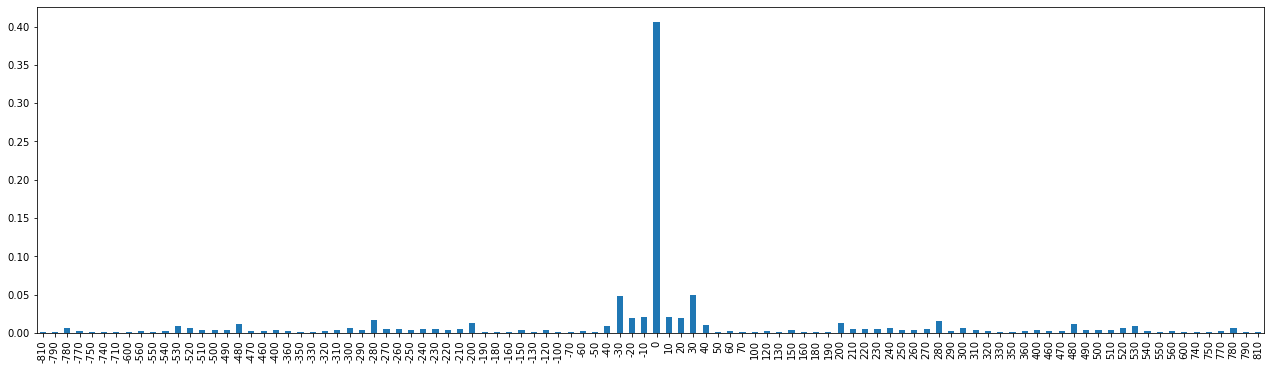

In [10]:
df['Par_var'].value_counts(normalize=True).nlargest(100).sort_index().plot(kind='bar',figsize=(22,6))

In [11]:
# takes 40s
# Create columns of double dummy by direction by suit. e.g. DD_N_C.
def Augment_DDmakes(ddmakes, prefix):
    ddmakesd = defaultdict(list)
    for dd in ddmakes:
        for direction,nesw in zip(mlBridgeLib.NESW,dd):
            for suit,cdhsn in zip(mlBridgeLib.CDHSN,nesw):
                assert cdhsn is not None
                ddmakesd['_'.join([prefix,direction,suit])].append(cdhsn)
    return ddmakesd

ddmakesd = Augment_DDmakes(df['DDmakes_nwse'],'DD_nwse')
ddmakesdf = pd.DataFrame(ddmakesd,dtype='int8')
display(ddmakesdf.dtypes,ddmakesdf.head())
assert len(df) == len(ddmakesdf)
df = pd.concat([df,ddmakesdf],axis='columns') # todo: why is join needed? -- ,join='inner')
del ddmakesdf,ddmakesd
display(df.dtypes,df)

DD_nwse_N_C    int8
DD_nwse_N_D    int8
DD_nwse_N_H    int8
DD_nwse_N_S    int8
DD_nwse_N_N    int8
DD_nwse_E_C    int8
DD_nwse_E_D    int8
DD_nwse_E_H    int8
DD_nwse_E_S    int8
DD_nwse_E_N    int8
DD_nwse_S_C    int8
DD_nwse_S_D    int8
DD_nwse_S_H    int8
DD_nwse_S_S    int8
DD_nwse_S_N    int8
DD_nwse_W_C    int8
DD_nwse_W_D    int8
DD_nwse_W_H    int8
DD_nwse_W_S    int8
DD_nwse_W_N    int8
dtype: object

DD_nwse_N_C  DD_nwse_N_D  DD_nwse_N_H  DD_nwse_N_S  DD_nwse_N_N  DD_nwse_E_C  DD_nwse_E_D  DD_nwse_E_H  DD_nwse_E_S  DD_nwse_E_N  DD_nwse_S_C  DD_nwse_S_D  DD_nwse_S_H  DD_nwse_S_S  DD_nwse_S_N  DD_nwse_W_C  DD_nwse_W_D  DD_nwse_W_H  DD_nwse_W_S  DD_nwse_W_N
0            9            3            9            3            8            2           10            3           10            2           10            3            9            3            8            2           10            3           10            2
1            8            8            7            7            7            4            5            6            6            5            8            8            7            7            7            4            5            6            6            5
2            8            6           10            4            6            5            7            2            9            4            8            6           10            4            6            5            7            2            9            4
3            2            1           10            8            1           11           11            3            5           11            2            1           10            8            1           11           11            3            5           11
4            7            3            6            2            4            6           10            6           11            8            7            3            6            2            4            6           10            6           11            8

ref                    object
hand_record_id         object
event_id                int64
Board                  string
EventBoard             string
Dealer                 object
Vul                    object
board_record_string    object
Hands                  object
Par                    object
Par_var                 int64
Par_nwse               object
DDmakes                object
DDmakes_nwse           object
DD_N_C                   int8
DD_N_D                   int8
DD_N_H                   int8
DD_N_S                   int8
DD_N_N                   int8
DD_E_C                   int8
DD_E_D                   int8
DD_E_H                   int8
DD_E_S                   int8
DD_E_N                   int8
DD_S_C                   int8
                        ...  
CT_EW_N_Game             bool
CT_EW_N_SSlam            bool
CT_EW_N_GSlam            bool
Vul_NS                   bool
Vul_EW                   bool
DD_nwse_N_C              int8
DD_nwse_N_D              int8
DD_nwse_N_

ref hand_record_id  event_id Board  EventBoard Dealer   Vul                                                   board_record_string                                                                                         Hands                                                                Par  Par_var                                                           Par_nwse                                                                         DDmakes                                                                    DDmakes_nwse  DD_N_C  DD_N_D  DD_N_H  DD_N_S  DD_N_N  DD_E_C  DD_E_D  DD_E_H  DD_E_S  DD_E_N  DD_S_C  DD_S_D  DD_S_H  DD_S_S  DD_S_N  DD_W_C  DD_W_D  DD_W_H  DD_W_S  DD_W_N                                                                                            Hands_Bin                                                    HB_N                                                    HB_E                                                    HB_S                                                    HB_W                                                                               HCP  HCP_N  HCP_N_S  HCP_N_H  HCP_N_D  HCP_N_C  HCP_E  HCP_E_S  HCP_E_H  HCP_E_D  HCP_E_C  HCP_S  HCP_S_S  HCP_S_H  HCP_S_D  HCP_S_C  HCP_W  HCP_W_S  HCP_W_H  HCP_W_D  HCP_W_C  ... CT_NS_H_Game  CT_NS_H_SSlam  CT_NS_H_GSlam  CT_NS_S_Pass  CT_NS_S_Partial  CT_NS_S_Game  CT_NS_S_SSlam  CT_NS_S_GSlam  CT_NS_N_Pass  CT_NS_N_Partial  CT_NS_N_Game  CT_NS_N_SSlam  CT_NS_N_GSlam  CT_EW_C_Pass  CT_EW_C_Partial  CT_EW_C_Game  CT_EW_C_SSlam  CT_EW_C_GSlam  CT_EW_D_Pass  CT_EW_D_Partial  CT_EW_D_Game CT_EW_D_SSlam  CT_EW_D_GSlam  CT_EW_H_Pass  CT_EW_H_Partial  CT_EW_H_Game  CT_EW_H_SSlam  CT_EW_H_GSlam  CT_EW_S_Pass  CT_EW_S_Partial  CT_EW_S_Game  CT_EW_S_SSlam  CT_EW_S_GSlam  CT_EW_N_Pass  CT_EW_N_Partial  CT_EW_N_Game  CT_EW_N_SSlam  CT_EW_N_GSlam  Vul_NS  Vul_EW  DD_nwse_N_C  DD_nwse_N_D  DD_nwse_N_H  DD_nwse_N_S  DD_nwse_N_N  DD_nwse_E_C  DD_nwse_E_D  DD_nwse_E_H  DD_nwse_E_S  DD_nwse_E_N  DD_nwse_S_C  DD_nwse_S_D  DD_nwse_S_H  DD_nwse_S_S  DD_nwse_S_N  DD_nwse_W_C  DD_nwse_W_D  DD_nwse_W_H  DD_nwse_W_S  DD_nwse_W_N
0        (acbl, 2620401)          77908    100961    09  200217A_09      N   E_W  ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63  ((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))                                         (200, [(4, S, *, EW, -1)])      300                                         (-100, [(5, C, *, S, -1)])        ((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))       ((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))      10       4      10       4       8       2       9       3       9       2      10       4      10       4       8       2       9       3       9       2  ((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...      0b100010000010000000001100010000000011001011100100  0b1000001001010001000000000001100100100100100000001001   0b100000100000100111100010010000000010000000100010010    0b11010000101000000011100000001011001000010000000000    ((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))      9        0        3        1        5     14        4        2        5        3     12        3        5        4        0      5        3        0        0        2  ...         True          False          False          True            False         False          False          False         False             True         False          False          False          True            False         False          False          False         False             True         False         False          False          True            False         False          False          False         False             True         False          False          False          True            False         False          False          False   False    True            

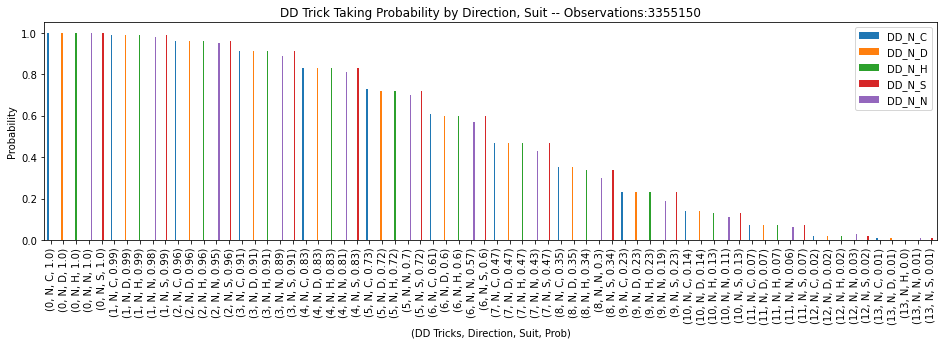

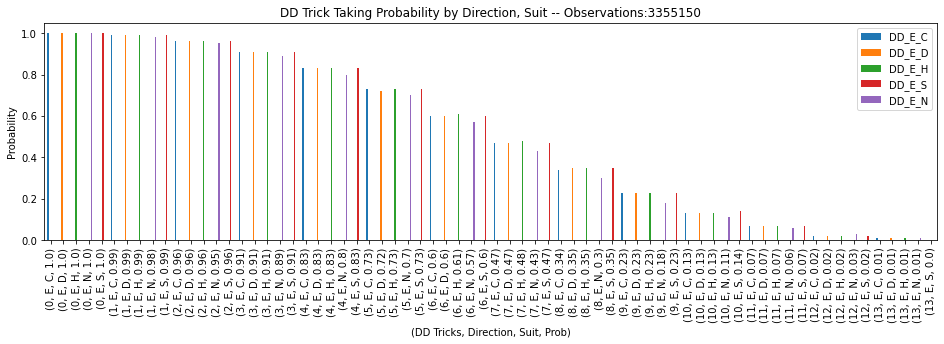

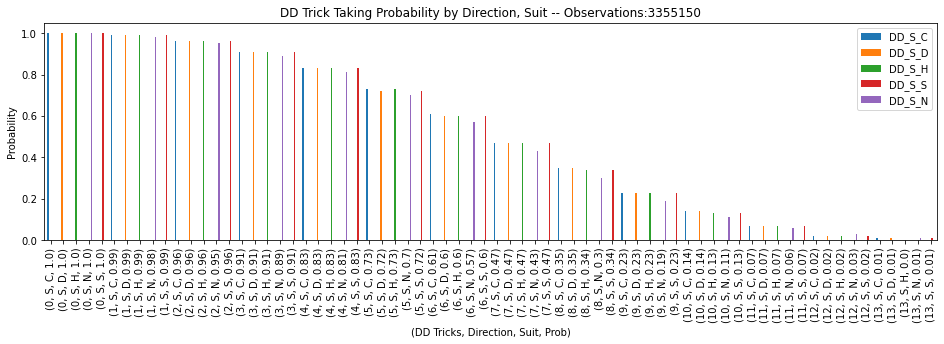

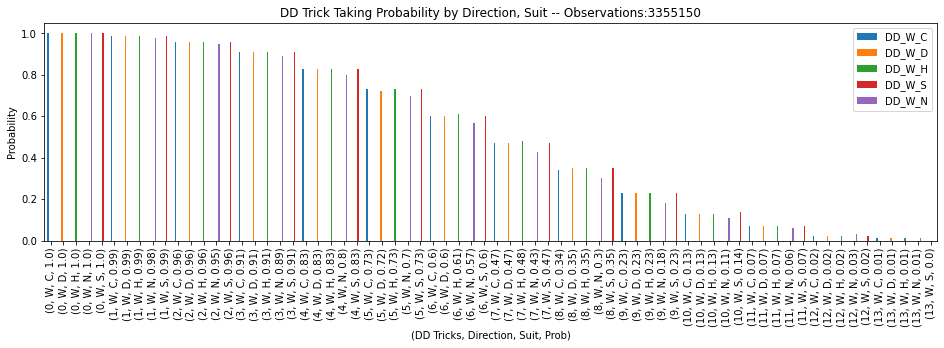

In [12]:
for d in mlBridgeLib.NESW: # list('N')
    plotd = {}
    for strain in mlBridgeLib.CDHSN:
        k = 'DD_'+d+'_'+strain
        vc = df[k].value_counts(normalize=True)
        probs = vc.sort_index(ascending=False).cumsum().round(2).sort_index()
        plotd[k] = pd.Series(probs.values,index=[(i,k[3],k[5],v) for i,v in probs.items()])
    pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='(DD Tricks, Direction, Suit, Prob)', ylabel='Probability', title='DD Trick Taking Probability by Direction, Suit -- Observations:'+str(len(df)))

In [14]:
# takes 3s
for d in mlBridgeLib.NESW: # list('N')
    for strain in mlBridgeLib.CDHSN:
        k = 'DD_'+d+'_'+strain
        k_nwse = 'DD_nwse_'+d+'_'+strain
        df[k+'_var'] = df[k]-df[k_nwse]
        df[k+'_avg'] = df[[k,k_nwse]].mean(axis='columns') # or df[k]-df[k+'_var']?
        print(df[k+'_var'].value_counts(), df[k+'_avg'].value_counts(), df[k+'_avg'].value_counts().sort_index())

 0    1627193
 1     696933
-1     685159
 2     154153
-2     147135
-3      20175
 3      18974
-4       2694
 4       2179
-5        278
 5        192
 6         73
-6         10
-7          1
 7          1
Name: DD_N_C_var, dtype: int64 6.00     250945
7.00     238089
5.00     230305
8.00     218967
4.00     197878
6.50     197128
5.50     188840
7.50     187326
9.00     185438
4.50     168376
8.50     154473
3.00     153944
3.50     138615
10.00    133607
9.50     120105
2.00     108390
2.50      84435
11.00     82040
10.50     73252
1.00      57912
1.50      47638
12.00     41521
11.50     36256
0.00      23838
0.50      16270
13.00     10563
12.50      8999
Name: DD_N_C_avg, dtype: int64 0.00      23838
0.50      16270
1.00      57912
1.50      47638
2.00     108390
2.50      84435
3.00     153944
3.50     138615
4.00     197878
4.50     168376
5.00     230305
5.50     188840
6.00     250945
6.50     197128
7.00     238089
7.50     187326
8.00     218967
8.50     154473
9.00    

 0    1643469
-1     690313
 1     678977
-2     152530
 2     146559
 3      20136
-3      18295
 4       2329
-4       1962
-5        415
 5        135
-6         14
 6         13
 7          2
-7          1
Name: DD_E_H_var, dtype: int64 7.00     247406
6.00     241504
5.00     234897
8.00     224708
4.00     202675
6.50     193121
5.50     190521
9.00     184604
7.50     184036
4.50     167410
8.50     158887
3.00     152750
10.00    135674
3.50     131820
9.50     117911
2.00     106488
2.50      87771
11.00     82934
10.50     72238
1.00      58904
1.50      47559
12.00     40596
11.50     32900
0.00      22720
0.50      14593
13.00     11016
12.50      9507
Name: DD_E_H_avg, dtype: int64 0.00      22720
0.50      14593
1.00      58904
1.50      47559
2.00     106488
2.50      87771
3.00     152750
3.50     131820
4.00     202675
4.50     167410
5.00     234897
5.50     190521
6.00     241504
6.50     193121
7.00     247406
7.50     184036
8.00     224708
8.50     158887
9.00    

 0     1554597
 1      567857
-1      561503
 2      210086
-2      204682
-3       79718
 3       77546
-4       34576
 4       34214
-5       11859
 5       11096
 6        2742
-6        2737
-7         802
 7         666
-8         230
 8         102
 10         62
 9          31
-9          27
-10         11
-11          5
 11          1
Name: DD_S_N_var, dtype: int64 6.00     297843
7.00     280245
5.00     266132
8.00     231888
4.00     214787
5.50     187013
6.50     184882
4.50     166837
3.00     166423
7.50     159072
9.00     151321
3.50     132054
8.50     123476
2.00     120140
10.00     96697
2.50      94492
9.50      90506
1.00      74221
11.00     64378
1.50      55021
10.50     54974
12.00     36120
0.00      31530
11.50     30151
0.50      22590
13.00     12314
12.50     10043
Name: DD_S_N_avg, dtype: int64 0.00      31530
0.50      22590
1.00      74221
1.50      55021
2.00     120140
2.50      94492
3.00     166423
3.50     132054
4.00     214787
4.50     166837
5

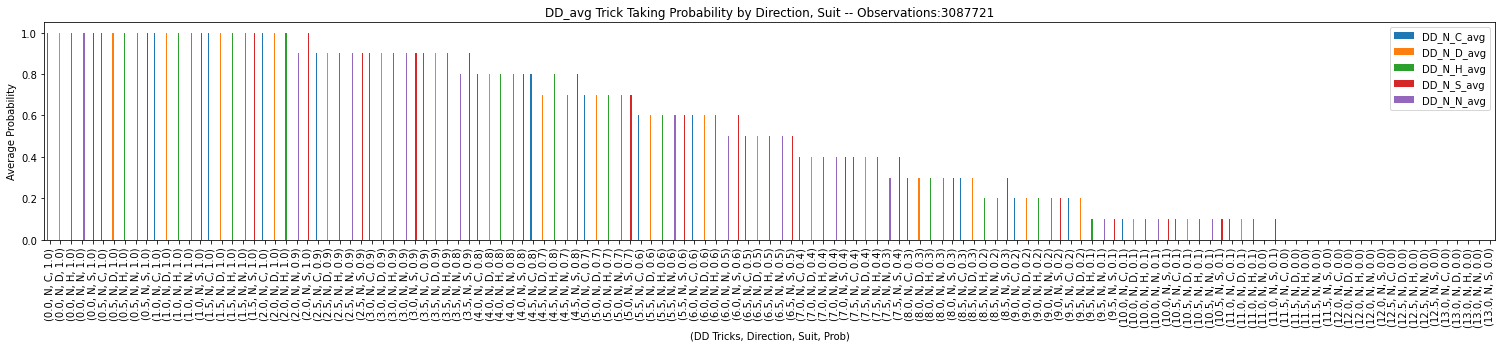

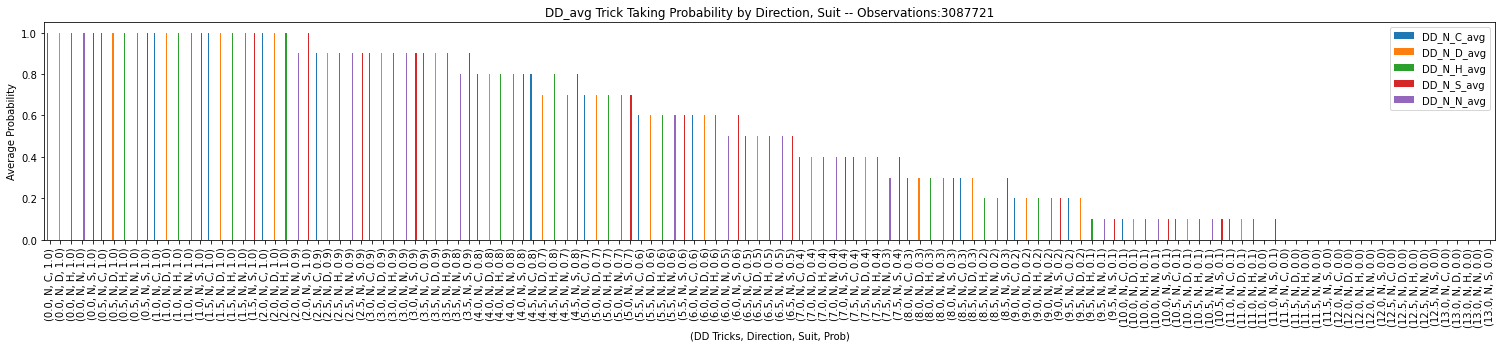

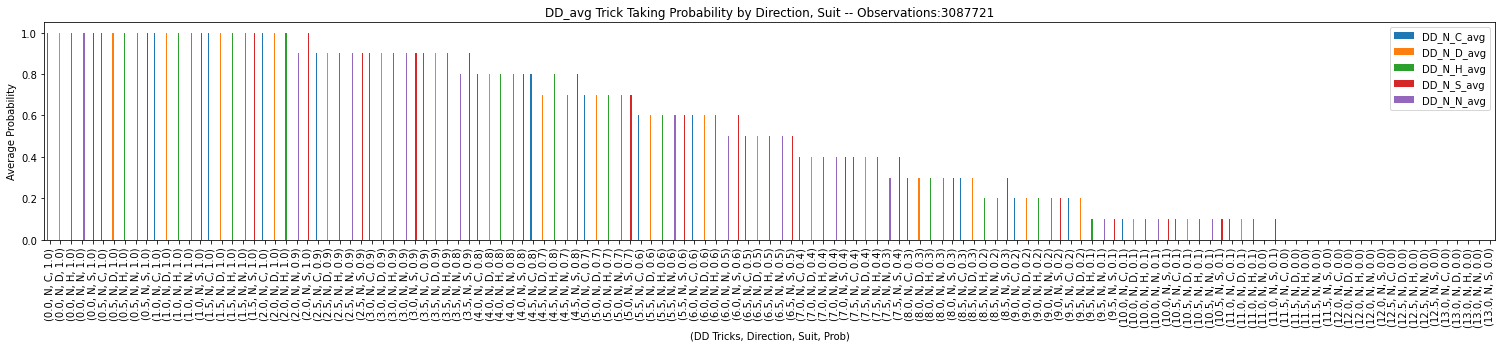

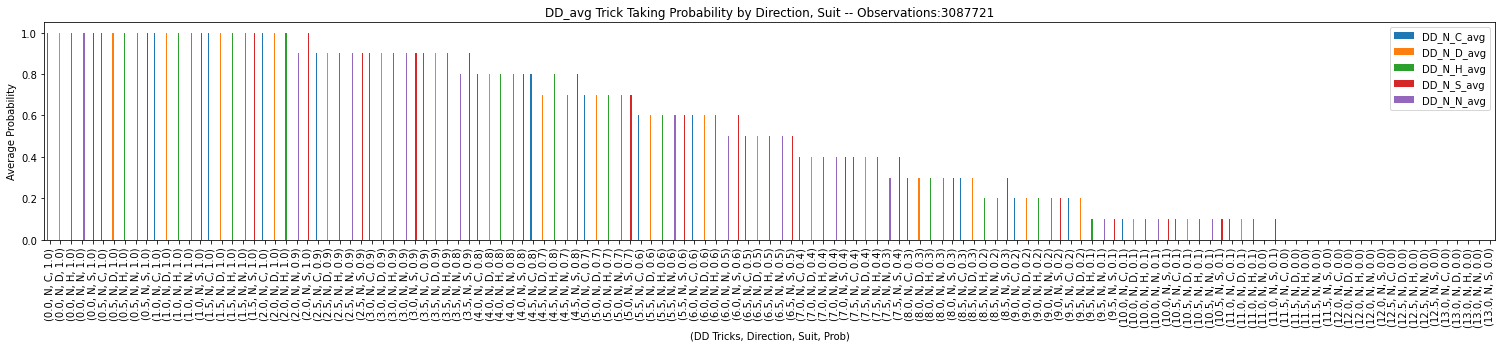

In [60]:
# caution: plot() may display missing bars due to 'x' in figsize(x,y) being too small. figsize(26,4) shows all bars but tiny.
for d in mlBridgeLib.NESW: # list('N')
    plotd = {}
    for strain in mlBridgeLib.CDHSN:
        k = 'DD_N_'+strain+'_avg'
        vc = df[k].value_counts(normalize=True)
        probs = vc.sort_index(ascending=False).cumsum().sort_index().round(1)
        plotd[k] = pd.Series(probs.values,index=[(i,k[3],k[5],v) for i,v in probs.items()])
    pd.DataFrame(plotd).plot(kind='bar',figsize=(26,4), xlabel='(DD Tricks, Direction, Suit, Prob)', ylabel='Average Probability', title='DD_avg Trick Taking Probability by Direction, Suit -- Observations:'+str(len(df)))

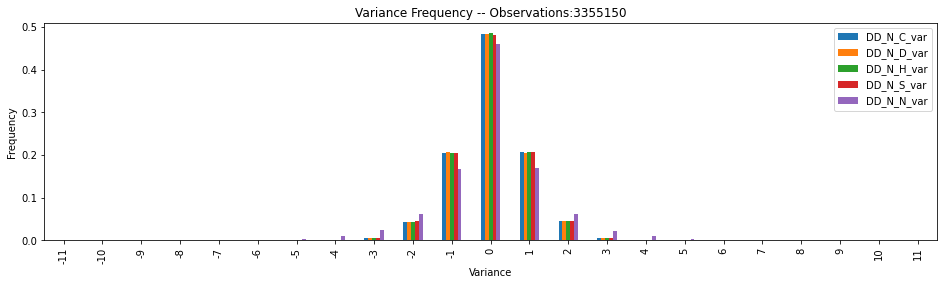

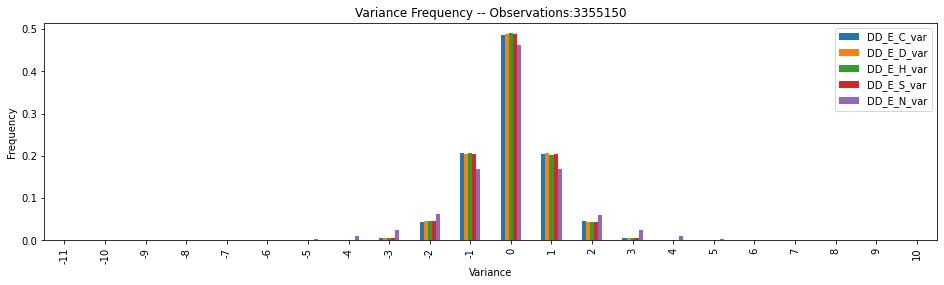

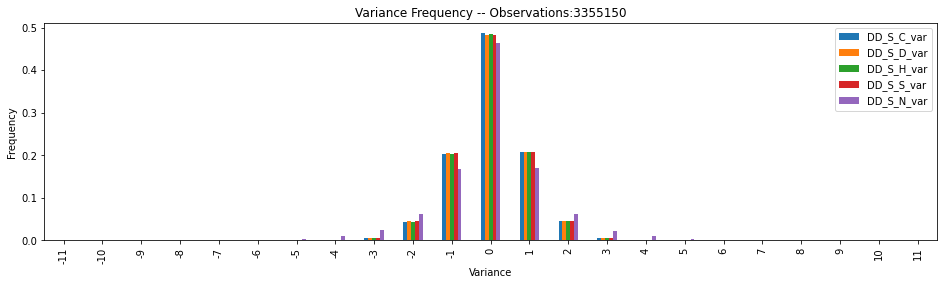

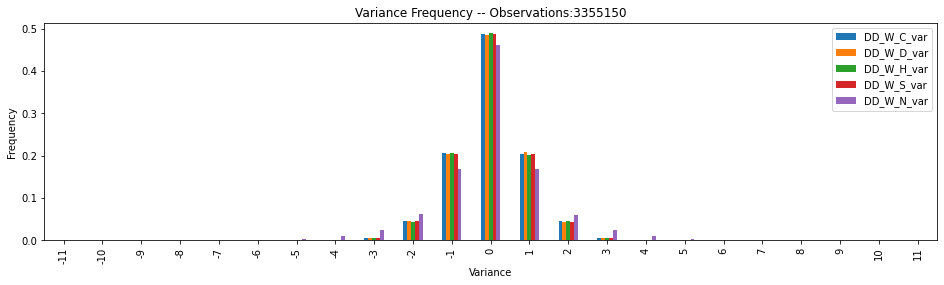

In [16]:
for d in mlBridgeLib.NESW: # list('N')
    plotd = {}
    for strain in mlBridgeLib.CDHSN:
        k = 'DD_'+d+'_'+strain+'_var'
        plotd[k] = df[k].value_counts(normalize=True).sort_index()
    pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance', ylabel='Frequency', title='Variance Frequency -- Observations:'+str(len(df)))

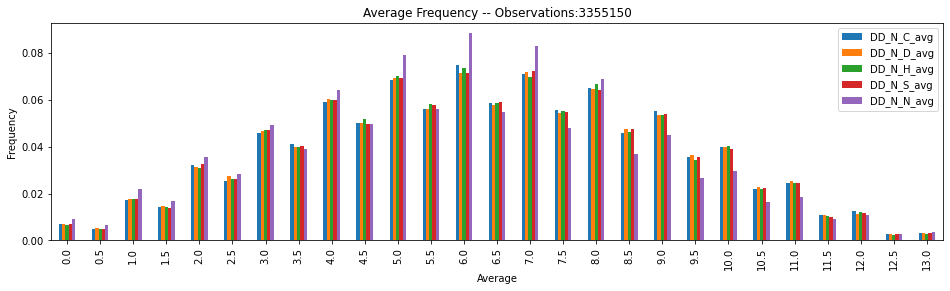

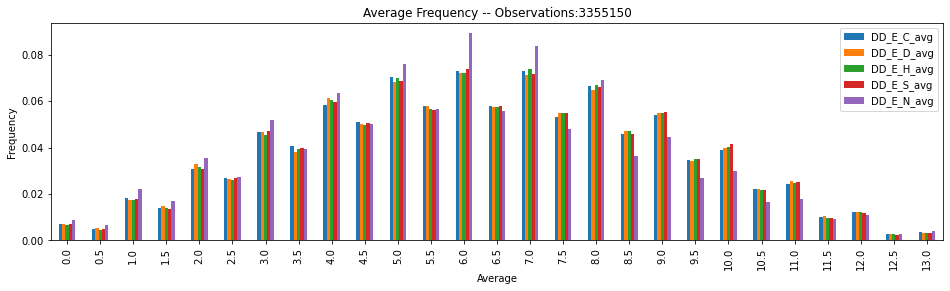

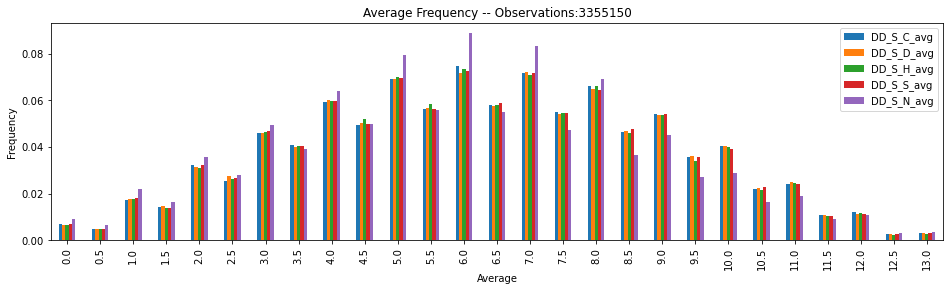

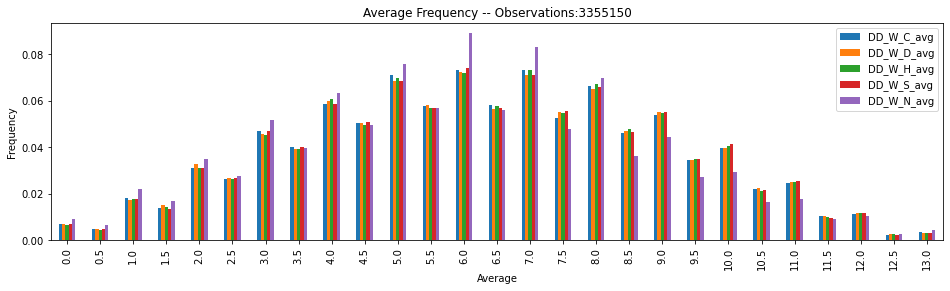

In [17]:
for d in mlBridgeLib.NESW: # list('N')
    plotd = {}
    for strain in mlBridgeLib.CDHSN:
        k = 'DD_'+d+'_'+strain+'_avg'
        plotd[k] = df[k].value_counts(normalize=True).sort_index()
    pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Average', ylabel='Frequency', title='Average Frequency -- Observations:'+str(len(df)))

In [18]:
# takes 2s
# todo: use different variable name than df
augmented_df = df.copy()

In [19]:
augmented_df.columns

Index(['ref', 'hand_record_id', 'event_id', 'Board', 'EventBoard', 'Dealer',
       'Vul', 'board_record_string', 'Hands', 'Par',
       ...
       'DD_W_C_var', 'DD_W_C_avg', 'DD_W_D_var', 'DD_W_D_avg', 'DD_W_H_var',
       'DD_W_H_avg', 'DD_W_S_var', 'DD_W_S_avg', 'DD_W_N_var', 'DD_W_N_avg'],
      dtype='object', length=261)

In [20]:
# take 5m
# convert Hands to OHE (One Hot Encoding)
tupled_handsl = augmented_df['Hands']
bin_handsl = mlBridgeLib.HandsLToBin(tupled_handsl)
print(len(bin_handsl),bin_handsl[:2])
ohe_handsl = mlBridgeLib.BinLToOHE(bin_handsl)
print(len(ohe_handsl),ohe_handsl[:2])
assert len(ohe_handsl[0]) == 52*4
retupled_handsl = mlBridgeLib.OHEToHandsL(ohe_handsl)
print(len(retupled_handsl),retupled_handsl[:2])
assert len(tupled_handsl) == len(retupled_handsl)
assert tupled_handsl[0] == retupled_handsl[0]
ohe_handsl[:2]

3355150 [('0b100010000010000000001100010000000011001011100100', '0b1000001001010001000000000001100100100100100000001001', '0b100000100000100111100010010000000010000000100010010', '0b11010000101000000011100000001011001000010000000000'), ('0b101001000010100000000000010000001100101001100010', '0b1001000010100000011100000000001001010001000000001001', '0b100010100000001000010100110100010000010010000010000', '0b10000000011100000001011001000100100000000110000100')]
3355150 [(0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

[(0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,


In [21]:
# takes 2m
# create dataframe of OHE hands
# todo: make restartable using new variable name
ohe_hands_df = pd.DataFrame(ohe_handsl,index=augmented_df.index,columns=[nesw+suit+denom for nesw in mlBridgeLib.NESW for suit in mlBridgeLib.SHDC for denom in mlBridgeLib.ranked_suit],dtype='int8')
augmented_df = pd.concat([augmented_df,ohe_hands_df],axis='columns')
display(len(augmented_df), augmented_df)

3355150

ref hand_record_id  event_id Board  EventBoard Dealer   Vul                                                   board_record_string                                                                                         Hands                                                                Par  Par_var                                                           Par_nwse                                                                         DDmakes                                                                    DDmakes_nwse  DD_N_C  DD_N_D  DD_N_H  DD_N_S  DD_N_N  DD_E_C  DD_E_D  DD_E_H  DD_E_S  DD_E_N  DD_S_C  DD_S_D  DD_S_H  DD_S_S  DD_S_N  DD_W_C  DD_W_D  DD_W_H  DD_W_S  DD_W_N                                                                                            Hands_Bin                                                    HB_N                                                    HB_E                                                    HB_S                                                    HB_W                                                                               HCP  HCP_N  HCP_N_S  HCP_N_H  HCP_N_D  HCP_N_C  HCP_E  HCP_E_S  HCP_E_H  HCP_E_D  HCP_E_C  HCP_S  HCP_S_S  HCP_S_H  HCP_S_D  HCP_S_C  HCP_W  HCP_W_S  HCP_W_H  HCP_W_D  HCP_W_C  ... SC9  SC8  SC7  SC6  SC5  SC4  SC3  SC2  WSA  WSK  WSQ  WSJ  WST  WS9  WS8  WS7  WS6  WS5  WS4  WS3  WS2 WHA  WHK  WHQ  WHJ  WHT  WH9  WH8  WH7  WH6  WH5  WH4  WH3  WH2  WDA  WDK  WDQ  WDJ  WDT  WD9  WD8  WD7  WD6  WD5  WD4  WD3  WD2  WCA  WCK  WCQ  WCJ  WCT  WC9  WC8  WC7  WC6  WC5  WC4  WC3  WC2
0        (acbl, 2620401)          77908    100961    09  200217A_09      N   E_W  ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63  ((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))                                         (200, [(4, S, *, EW, -1)])      300                                         (-100, [(5, C, *, S, -1)])        ((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))       ((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))      10       4      10       4       8       2       9       3       9       2      10       4      10       4       8       2       9       3       9       2  ((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...      0b100010000010000000001100010000000011001011100100  0b1000001001010001000000000001100100100100100000001001   0b100000100000100111100010010000000010000000100010010    0b11010000101000000011100000001011001000010000000000    ((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))      9        0        3        1        5     14        4        2        5        3     12        3        5        4        0      5        3        0        0        2  ...   0    0    0    1    0    0    1    0    0    0    1    1    0    1    0    0    0    0    1    0    1   0    0    0    0    0    0    0    1    1    1    0    0    0    0    0    0    0    1    0    1    1    0    0    1    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0
1        (acbl, 2620412)          77908    100961    20  200217A_20      W  Both  ST85HKJDJ43CKJ873SQ32HA643DK96CT94SAJ64HT98DT75CA52SK97HQ752DAQ82CQ6  ((T85, KJ, J43, KJ873), (AJ64, T98, T75, A52), (K97, Q752, AQ82, Q6), (Q32, A643, K96, T94))          (90, [(1, D, , NS, 1), (1, C, , NS, 1), (1, N, , NS, 0)])        0          (90, [(1, N, , NS, 0), (1, D, , NS, 1), (1, C, , NS, 1)])            ((8, 8, 7, 7, 7), (4, 5, 6, 6, 6), (8, 8, 7, 7, 7), (4, 5, 6, 6, 6))            ((8, 8, 7, 7, 7), (4, 5, 6, 6, 5), (8, 8, 7, 7, 7), (4, 5, 6, 6, 5))       8       8       7       7       7       4       5       6       6       6       8       8       7       7       7       4       5       6       6       6  ((0b101001000010100000000000010000001100101001100010, (0b101001000, 0b101000000000, 0b1000000110...      0b1010010000101000000000000

In [22]:
# takes 2m
# create dataframe of OHE contracts
# todo: make restartable using new variable name
#contractsd = {'DD_N_'+s+'_'+str(l): 1 if l == augmented_df['DD_N_'+s+'_avg'] else 0 for l in range(0,14) for s in mlBridgeLib.CDHSN}
#contractsd 
#ohe_hands_df = pd.DataFrame(ohe_handsl,index=augmented_df.index,columns=[nesw+suit+denom for nesw in mlBridgeLib.NESW for suit in mlBridgeLib.SHDC for denom in mlBridgeLib.ranked_suit],dtype='int8')
#augmented_df = pd.concat([augmented_df,ohe_hands_df],axis='columns')
#len(augmented_df), augmented_df

In [23]:
# takes 1m30s
acbl_hand_records_dd_nwse_augmented_filename = 'acbl_hand_records_dd_nwse_augmented.pkl'
acbl_hand_records_dd_nwse_augmented_file = acblPath.joinpath(acbl_hand_records_dd_nwse_augmented_filename)
pd.to_pickle(augmented_df, acbl_hand_records_dd_nwse_augmented_file)

In [24]:
# takes 45s
acbl_hand_records_dd_nwse_augmented_filename = 'acbl_hand_records_dd_nwse_augmented.pkl'
acbl_hand_records_dd_nwse_augmented_file = acblPath.joinpath(acbl_hand_records_dd_nwse_augmented_filename)
augmented_df = pd.read_pickle(acbl_hand_records_dd_nwse_augmented_file)
display(len(augmented_df),augmented_df)

3355150

ref hand_record_id  event_id Board  EventBoard Dealer   Vul                                                   board_record_string                                                                                         Hands                                                                Par  Par_var                                                           Par_nwse                                                                         DDmakes                                                                    DDmakes_nwse  DD_N_C  DD_N_D  DD_N_H  DD_N_S  DD_N_N  DD_E_C  DD_E_D  DD_E_H  DD_E_S  DD_E_N  DD_S_C  DD_S_D  DD_S_H  DD_S_S  DD_S_N  DD_W_C  DD_W_D  DD_W_H  DD_W_S  DD_W_N                                                                                            Hands_Bin                                                    HB_N                                                    HB_E                                                    HB_S                                                    HB_W                                                                               HCP  HCP_N  HCP_N_S  HCP_N_H  HCP_N_D  HCP_N_C  HCP_E  HCP_E_S  HCP_E_H  HCP_E_D  HCP_E_C  HCP_S  HCP_S_S  HCP_S_H  HCP_S_D  HCP_S_C  HCP_W  HCP_W_S  HCP_W_H  HCP_W_D  HCP_W_C  ... SC9  SC8  SC7  SC6  SC5  SC4  SC3  SC2  WSA  WSK  WSQ  WSJ  WST  WS9  WS8  WS7  WS6  WS5  WS4  WS3  WS2 WHA  WHK  WHQ  WHJ  WHT  WH9  WH8  WH7  WH6  WH5  WH4  WH3  WH2  WDA  WDK  WDQ  WDJ  WDT  WD9  WD8  WD7  WD6  WD5  WD4  WD3  WD2  WCA  WCK  WCQ  WCJ  WCT  WC9  WC8  WC7  WC6  WC5  WC4  WC3  WC2
0        (acbl, 2620401)          77908    100961    09  200217A_09      N   E_W  ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63  ((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))                                         (200, [(4, S, *, EW, -1)])      300                                         (-100, [(5, C, *, S, -1)])        ((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))       ((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))      10       4      10       4       8       2       9       3       9       2      10       4      10       4       8       2       9       3       9       2  ((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...      0b100010000010000000001100010000000011001011100100  0b1000001001010001000000000001100100100100100000001001   0b100000100000100111100010010000000010000000100010010    0b11010000101000000011100000001011001000010000000000    ((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))      9        0        3        1        5     14        4        2        5        3     12        3        5        4        0      5        3        0        0        2  ...   0    0    0    1    0    0    1    0    0    0    1    1    0    1    0    0    0    0    1    0    1   0    0    0    0    0    0    0    1    1    1    0    0    0    0    0    0    0    1    0    1    1    0    0    1    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0
1        (acbl, 2620412)          77908    100961    20  200217A_20      W  Both  ST85HKJDJ43CKJ873SQ32HA643DK96CT94SAJ64HT98DT75CA52SK97HQ752DAQ82CQ6  ((T85, KJ, J43, KJ873), (AJ64, T98, T75, A52), (K97, Q752, AQ82, Q6), (Q32, A643, K96, T94))          (90, [(1, D, , NS, 1), (1, C, , NS, 1), (1, N, , NS, 0)])        0          (90, [(1, N, , NS, 0), (1, D, , NS, 1), (1, C, , NS, 1)])            ((8, 8, 7, 7, 7), (4, 5, 6, 6, 6), (8, 8, 7, 7, 7), (4, 5, 6, 6, 6))            ((8, 8, 7, 7, 7), (4, 5, 6, 6, 5), (8, 8, 7, 7, 7), (4, 5, 6, 6, 5))       8       8       7       7       7       4       5       6       6       6       8       8       7       7       7       4       5       6       6       6  ((0b101001000010100000000000010000001100101001100010, (0b101001000, 0b101000000000, 0b1000000110...      0b1010010000101000000000000

In [25]:
valid_start, valid_end = "210801","210815"
test_start, test_end = valid_end, "999999"
#valid_start, valid_end = "210601","210701"
#test_start, test_end = valid_end, "999999"

In [26]:
# takes 8s
augmented_df['Valid'] = augmented_df['EventBoard'].between(valid_start,valid_end,inclusive='left')
sum(augmented_df['Valid'])

85646

In [27]:
# takes 10s
# remove test dataset from df
augmented_df['Test'] = augmented_df['EventBoard'].between(test_start,test_end,inclusive='left')
test = augmented_df[augmented_df['Test']].copy()
augmented_df = augmented_df[~augmented_df['Test']].copy()
len(augmented_df),len(test),sum(test['Test'])

(3087721, 267429, 267429)

In [28]:
# takes 4m-14m
import fastai.tabular.all

# dependent variable column names
dep_vars = ['DD_N_C_avg', 'DD_N_D_avg', 'DD_N_H_avg', 'DD_N_S_avg', 'DD_N_N_avg']
dep_vars += ['HCP_E', 'HCP_S', 'HCP_W']
dep_vars += ['QT_S', 'QT_S_S', 'QT_S_H', 'QT_S_D', 'QT_S_C']
dep_vars += ['SL_S_S', 'SL_S_H', 'SL_S_D', 'SL_S_C']
display("dep_vars:",dep_vars)

# continuous valued column names
cont_names = ['Vul_NS', 'Vul_EW']
#cont_names += ['HCP_NS', 'HCP_EW']
cont_names += ['HCP_N'] #, 'HCP_S']
cont_names += ['HCP_N_S', 'HCP_N_H', 'HCP_N_D', 'HCP_N_C']
#cont_names += ['HCP_S_S', 'HCP_S_H', 'HCP_S_D', 'HCP_S_C']
#cont_names += ['HCP_E_S', 'HCP_E_H', 'HCP_E_D', 'HCP_E_C']
#cont_names += ['HCP_W_S', 'HCP_W_H', 'HCP_W_D', 'HCP_W_C']
cont_names += ['QT_N_S', 'QT_N_H', 'QT_N_D', 'QT_N_C']
cont_names += ['SL_N_S', 'SL_N_H', 'SL_N_D', 'SL_N_C']
cont_names += [direction+suit+card for direction in ['N'] for suit in mlBridgeLib.SHDC for card in mlBridgeLib.ranked_suit if direction+suit+card in augmented_df]
#cont_names += ohe_hands_df.columns.to_list()

# categorical valued column names. fastai wants ints.
# better?
#cat_names = list(df.select_dtypes(['category']).columns)
#df[cat_names] = df[cat_names].apply(lambda x: x.cat.codes)
cat_names = ['SL_Max_NS', 'SL_Max_EW']

#split = fastai.tabular.all.RandomSplitter(valid_pct=0.2)(fastai.tabular.all.range_of(df))
#test = pd.Series(augmented_df['EventBoard'].ge("210701"),name='Test',dtype='bool') # note: using augmented_df instead of df for split
#valid = pd.Series(augmented_df['EventBoard'].between("210601","210701"),name='Valid',dtype='bool') # note: using augmented_df instead of df for split
df = augmented_df[cont_names+cat_names+dep_vars].copy() # pd.concat([augmented_df[cont_names+cat_names],valid],axis='columns')
df.reset_index(drop=True,inplace=True)
display(len(df), df.head())

for n in cat_names:
    df[n] = df[n].cat.codes
cont_names += cat_names
cat_names = []
print(cont_names, cat_names)

# current fastai/pytorch has a bug where bool is treated as object and thus erroring out.
for n in cont_names:
    if pd.api.types.is_bool_dtype(df[n]):
        df[n] = df[n].astype('uint8')

# special case catagoricals: catagoricals which are to be made into continuous
#df = df.astype({'Par_Score':'int16'})

#assert len(set(cont_names+cat_names+dep_vars)) == len(cont_names+cat_names)
assert len(set(cont_names+cat_names+dep_vars)) == len(cont_names+cat_names+dep_vars)
for n in df:
    assert n in cont_names+cat_names+dep_vars, n
    assert not pd.api.types.is_bool_dtype(df[n]), n # TabularDataLoaders.from_df has bug which disallows bool
    assert not pd.api.types.is_object_dtype(df[n]), n
for n in cont_names+cat_names+dep_vars:
    assert n in df

# create fastai dataloader
procs = [fastai.tabular.all.Normalize] # fastai.tabular.all.Categorify, fastai.tabular.all.FillMissing, 
y_names = dep_vars
# valid_idx specifies a list of indexes to validation rows.
#assert pd.api.types.is_bool_dtype(df['Valid'])
valid_idx = df[augmented_df['Valid'].values].index # using augmented_df
assert max(valid_idx) < len(df)
bs = 1024 # fastai results weird out at > 1024 (on 1660ti).
device = 'cuda' # 'cuda' or 'cpu'
# interaction problem between specifying all cont_names, cat_names and valid_idx.

dls = fastai.tabular.all.TabularDataLoaders.from_df(df, proc=procs, cont_names=cont_names, cat_names=cat_names,
    y_names=y_names, valid_idx=valid_idx, bs=bs, device=device, verbose=True) # max is len(df)-len(valid_idx)

# create fastai tabular_learner from dataloader
layers = [8192, 8192, 4096, 4096, 2048, 2048, 1024, 1024, 512, 512, 256, 256, 128, 128, 64, 64, 32, 32, 16, 16]
metrics = fastai.tabular.all.accuracy_multi if len(y_names) else fastai.tabular.all.accuracy
learn = fastai.tabular.all.tabular_learner(dls, layers=layers, metrics=metrics)

# fit data
learn.fit(1)

'dep_vars:'

['DD_N_C_avg',
 'DD_N_D_avg',
 'DD_N_H_avg',
 'DD_N_S_avg',
 'DD_N_N_avg',
 'HCP_E',
 'HCP_S',
 'HCP_W',
 'QT_S',
 'QT_S_S',
 'QT_S_H',
 'QT_S_D',
 'QT_S_C',
 'SL_S_S',
 'SL_S_H',
 'SL_S_D',
 'SL_S_C']

3087721

Vul_NS  Vul_EW  HCP_N  HCP_N_S  HCP_N_H  HCP_N_D  HCP_N_C  QT_N_S  QT_N_H  QT_N_D  QT_N_C  SL_N_S  SL_N_H  SL_N_D  SL_N_C  NSA  NSK  NSQ  NSJ  NST  NS9  NS8  NS7  NS6  NS5  NS4  NS3  NS2  NHA  NHK  NHQ  NHJ  NHT  NH9  NH8  NH7  NH6  NH5  NH4  NH3  NH2  NDA  NDK  NDQ  NDJ  NDT  ND9  ND8  ND7  ND6  ND5  ND4  ND3  ND2  NCA  NCK  NCQ  NCJ  NCT  NC9  NC8  NC7  NC6  NC5  NC4  NC3  NC2 SL_Max_NS SL_Max_EW  DD_N_C_avg  DD_N_D_avg  DD_N_H_avg  DD_N_S_avg  DD_N_N_avg  HCP_E  HCP_S  HCP_W  QT_S  QT_S_S  QT_S_H  QT_S_D  QT_S_C  SL_S_S  SL_S_H  SL_S_D  SL_S_C
0   False    True      9        0        3        1        5    0.00    0.50    0.00    1.00       2       3       2       6    0    0    0    0    1    0    0    0    1    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    1    1    0    0    0    1    0    0    0    0    0    0    0    0    1    1    0    0    1    0    1    1    1    0    0    1    0    0   SL_NS_H   SL_EW_S        9.50        3.50        9.50        3.50        8.00     14     12      5  2.50    0.50    1.00    1.00    0.00       2       6       2       3
1    True    True      9        0        4        1        4    0.00    0.50    0.00    0.50       3       2       3       5    0    0    0    0    1    0    1    0    0    1    0    0    0    0    1    0    1    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    1    1    0    0    1    0    1    0    0    1    1    0    0    0    1    0   SL_NS_D   SL_EW_S        8.00        8.00        7.00        7.00        7.00      9     13      9  2.00    0.50    0.00    1.50    0.00       3       4       4       2
2   False    True      9        0        0        6        3    0.00    0.00    1.50    0.00       1       3       4       5    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    1    0    1    0    0    1    0    1    0    0    1    0    0    0    0    0    0    1    0    0    1    1    0    0    0    0    1    1    0    1    0   SL_NS_H   SL_EW_S        8.50        6.50        9.50        4.00        6.00      3     14     14  3.00    1.00    1.50    0.50    0.00       3       6       2       2
3    True   False      5        0        3        1        1    0.00    0.00    0.00    0.00       1       6       2       4    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    1    1    0    1    0    0    1    0    0    1    1    0    0    0    1    0    1    0    0    0    0    0    0    0    0    0    0    1    0    1    0    0    0    0    0    1    1   SL_NS_H   SL_EW_D        1.50        0.50       10.00        8.00        1.00     21      7      7  1.50    1.00    0.50    0.00    0.00       7       4       1       1
4    True    True      9        0        2        0        7    0.00    0.00    0.00    2.00       1       5       2       5    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    1    0    1    0    0    1    1    0    0    0    1    0    0    0    0    0    1    0    0    0    0    0    0    1    1    1    0    0    1    1    0    0    0    0    0    0    1   SL_NS_H   SL_EW_S        6.50        2.50        6.00        1.50        3.50     11      4     16  0.00    0.00    0.00    0.00    0.00       3       3       4       3

['Vul_NS', 'Vul_EW', 'HCP_N', 'HCP_N_S', 'HCP_N_H', 'HCP_N_D', 'HCP_N_C', 'QT_N_S', 'QT_N_H', 'QT_N_D', 'QT_N_C', 'SL_N_S', 'SL_N_H', 'SL_N_D', 'SL_N_C', 'NSA', 'NSK', 'NSQ', 'NSJ', 'NST', 'NS9', 'NS8', 'NS7', 'NS6', 'NS5', 'NS4', 'NS3', 'NS2', 'NHA', 'NHK', 'NHQ', 'NHJ', 'NHT', 'NH9', 'NH8', 'NH7', 'NH6', 'NH5', 'NH4', 'NH3', 'NH2', 'NDA', 'NDK', 'NDQ', 'NDJ', 'NDT', 'ND9', 'ND8', 'ND7', 'ND6', 'ND5', 'ND4', 'ND3', 'ND2', 'NCA', 'NCK', 'NCQ', 'NCJ', 'NCT', 'NC9', 'NC8', 'NC7', 'NC6', 'NC5', 'NC4', 'NC3', 'NC2', 'SL_Max_NS', 'SL_Max_EW'] []
Setting up after_item: Pipeline: 
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: ReadTabBatch


In [29]:
assert all(df[augmented_df['Valid'].values].index == valid_idx)

In [30]:
def AppendPredictionsToDF(df, preds):
    valid_idx = df.index
    df_preds = pd.concat([df,pd.DataFrame(preds,index=valid_idx,columns=[n+'_pred' for n in y_names])],axis='columns')
    for n in y_names:
        df_preds.loc[valid_idx,n+'_var'] = df_preds[n]-df_preds[n+'_pred']
        # todo: use SL_Max_NS column as an index into 'DD_N_?', 'DD_N_?_pred', 'DD_N_?_var' to get max for each row
        #for sl in ['SL_Max_NS','SL_Max_EW']:
        #df_preds.loc[valid_idx,n+'_actual'] = df_preds.loc[valid_idx].apply(lambda r: r[[n+'_avg'][int(r[sl])]],axis='columns')
        #df_preds.loc[valid_idx,n+'_pred'] = df_preds.loc[valid_idx].apply(lambda r: r[[n+'_avg_pred'][int(r[sl])]],axis='columns')
        #df_preds.loc[valid_idx,n+'_avg_var'] = df_preds.loc[valid_idx,n+'_avg_actual']-df_preds.loc[valid_idx,n+'_avg_pred']
    return df_preds

In [31]:
# takes 2s
# get validation dataset predictions
preds, actuals = learn.get_preds() # defaults to learn.dls.valid
len(preds), len(actuals), preds, actuals

(85646,
 85646,
 tensor([[4.6088, 8.8753, 6.6416,  ..., 3.2854, 4.3686, 2.2019],
         [3.6207, 5.6289, 5.9296,  ..., 3.4035, 3.1842, 2.3405],
         [7.1908, 8.8820, 4.3385,  ..., 2.2536, 4.8300, 2.8367],
         ...,
         [5.5664, 3.3365, 7.9387,  ..., 4.3721, 2.1268, 3.2962],
         [4.6560, 3.3581, 5.7041,  ..., 3.5620, 1.9538, 3.5899],
         [5.7446, 3.5524, 7.8888,  ..., 4.3556, 2.3200, 3.2032]]),
 tensor([[4.5000, 6.0000, 3.0000,  ..., 4.0000, 3.0000, 1.0000],
         [7.0000, 7.5000, 7.5000,  ..., 5.0000, 5.0000, 0.0000],
         [5.0000, 7.0000, 3.5000,  ..., 2.0000, 6.0000, 1.0000],
         ...,
         [6.5000, 3.0000, 7.0000,  ..., 3.0000, 2.0000, 5.0000],
         [5.0000, 3.0000, 5.0000,  ..., 4.0000, 1.0000, 5.0000],
         [5.5000, 0.0000, 5.5000,  ..., 5.0000, 2.0000, 4.0000]]))

In [32]:
pd.concat([pd.DataFrame(actuals),pd.DataFrame(preds)],axis='columns')

0     1     2     3     4     5     6     7    8    9    10   11   12   13   14   15   16    0    1     2    3    4     5     6     7    8    9    10   11   12   13   14   15   16
0      4.50  6.00  3.00  4.50  3.50 12.00  5.00 15.00 1.00 1.00 0.00 0.00 0.00 5.00 4.00 3.00 1.00  4.61 8.88  6.64 6.45 6.41  9.82 11.82  9.84 2.24 0.51 0.57 0.78 0.37 3.24 3.29 4.37 2.20
1      7.00  7.50  7.50 12.00  7.50  9.00 16.00  8.00 3.00 0.50 1.00 1.50 0.00 3.00 5.00 5.00 0.00  3.62 5.63  5.93 7.27 4.96 10.90 11.36 10.77 2.15 0.64 0.58 0.53 0.39 4.00 3.40 3.18 2.34
2      5.00  7.00  3.50  4.00  3.50 16.00  8.00  9.00 1.00 1.00 0.00 0.00 0.00 4.00 2.00 6.00 1.00  7.19 8.88  4.34 5.90 6.31  9.94 12.31 10.00 2.35 0.55 0.42 0.93 0.48 3.20 2.25 4.83 2.84
3      8.50  6.50  8.50  9.50  7.50  8.00 12.00  7.00 3.00 1.50 1.50 0.00 0.00 6.00 2.00 1.00 4.00  7.28 5.76  8.06 9.29 7.59  8.45 10.11  8.53 1.81 0.57 0.50 0.28 0.48 4.01 3.42 2.20 3.30
4      2.00  8.50  2.50  3.00  6.50 13.00  9.00 10.00 2.00 0.00 0.00 2.00 0.00 3.00 1.00 7.00 2.00  6.41 8.52  4.03 6.12 5.90 10.36 11.24 10.33 2.09 0.49 0.35 0.79 0.47 3.33 2.24 4.55 3.02
5     11.00  8.50  9.00 11.00 11.00  6.00 14.00  4.00 2.00 2.00 0.00 0.00 0.00 6.00 1.00 3.00 3.00 10.53 5.94  8.19 8.31 8.66  7.62  8.28  7.75 1.39 0.31 0.36 0.20 0.48 3.35 3.38 2.24 4.16
6      7.50  3.00  5.00  1.50  3.50 12.00  5.00 15.00 0.50 0.00 0.00 0.50 0.00 3.00 5.00 2.00 3.00  8.07 4.95  5.49 3.81 5.11 10.86  9.55 10.86 1.70 0.29 0.38 0.37 0.64 2.42 3.09 2.97 4.55
7      7.50  7.00  7.00  7.50  6.00  9.00  8.00 12.00 2.00 2.00 0.00 0.00 0.00 5.00 3.00 1.00 4.00  5.50 5.73  4.09 7.46 5.35 10.69  9.76 10.56 1.73 0.54 0.31 0.40 0.47 3.89 2.55 3.04 3.47
8      4.50  5.50  4.50  7.00  4.50 11.00  9.00 12.00 1.50 0.50 0.50 0.00 0.50 4.00 4.00 1.00 4.00  3.52 4.75  2.51 6.03 3.58 12.69  8.15 12.07 1.30 0.31 0.25 0.20 0.55 3.46 2.62 2.42 4.44
9     12.00 10.00 11.00  5.00  8.00 10.00  6.00  3.00 0.50 0.00 0.50 0.00 0.00 1.00 5.00 4.00 3.00  8.82 8.59 10.53 7.41 9.42  6.24  5.43  6.53 0.65 0.10 0.29 0.08 0.17 2.45 3.93 3.02 3.25
10     6.00  6.00 10.00 10.00  7.00  7.00 16.00  8.00 4.00 2.00 0.00 2.00 0.00 6.00 2.00 3.00 2.00  3.31 5.89  7.67 5.42 4.95 11.00 10.79 11.09 2.00 0.50 0.64 0.53 0.32 3.23 4.22 3.44 2.18
11     3.50  6.00  4.50  3.50  4.50 17.00  7.00  7.00 1.50 0.00 0.50 0.00 1.00 4.00 2.00 3.00 4.00  5.50 7.35  5.06 3.50 4.90 11.16  9.05 11.01 1.56 0.22 0.37 0.53 0.44 2.35 3.04 4.13 3.46
12     7.50  7.50  8.50  7.00  9.50  4.00 15.00 11.00 2.50 1.00 0.00 0.50 1.00 3.00 3.00 3.00 4.00  3.66 5.60  7.80 5.35 4.96 10.93  7.84 11.02 1.25 0.33 0.43 0.29 0.18 3.19 4.22 3.26 2.41
13     9.00 12.50 13.00 12.00 13.00  2.00 14.00  8.00 3.00 0.00 0.00 2.00 1.00 4.00 1.00 5.00 3.00  5.56 8.09  9.69 7.77 7.89  7.97  8.16  7.99 1.37 0.36 0.48 0.28 0.20 3.19 4.10 3.29 2.31
14     0.00  1.50  0.00  8.00  0.00 12.00  7.00 16.00 1.00 1.00 0.00 0.00 0.00 7.00 0.00 4.00 2.00  4.61 4.73  3.05 6.39 3.98 11.98 12.85 11.99 2.50 0.79 0.43 0.61 0.69 3.87 2.53 3.07 3.59
15     7.00  9.00  7.50  8.00  9.00  8.00 10.00  7.00 2.00 0.50 0.00 0.50 1.00 4.00 3.00 5.00 1.00  7.48 8.86  6.39 5.55 7.11  8.90  7.28  8.85 1.12 0.17 0.23 0.43 0.27 2.60 2.89 4.23 3.21
16     5.00  6.00  9.00  7.00  6.00  5.00 10.00 14.00 2.00 2.00 0.00 0.00 0.00 3.00 4.00 3.00 3.00  3.81 6.17  8.29 5.95 5.54 10.22  8.11 10.30 1.33 0.36 0.46 0.31 0.18 3.21 4.22 3.28 2.24
17     7.50  8.00  6.50  8.50  6.00 13.00 14.00  5.00 3.00 0.00 1.50 1.50 0.00 1.00 5.00 5.00 2.00  5.57 5.60  4.03 7.36 5.22 10.74 11.10 10.74 2.07 0.66 0.36 0.51 0.54 3.95 2.51 3.16 3.35
18    10.50  7.50  7.00  7.00  9.00  7.00 17.00  9.00 3.50 0.00 1.00 1.50 1.00 2.00 2.00 4.00 5.00  8.57 3.66  5.88 6.15 5.77 10.45 10.96 10.43 2.07 0.51 0.50 0.33 0.69 3.39 3.23 2.25 4.33
19     9.00  6.00  8.00  6.00  7.50  6.00 14.00 12.00 2.50 0.50 1.00 0.00 1.00 4.00 3.00 3.00 3.00  8.82 3.85  6.28 6.43 6.12 10.09 10.69 10.11 2.01 0.49 0.49 0.31 0.66 3.40 3.29 2.21 4.31
20     8.00  8.00  9.00  6.00  7.50  8.0

In [33]:
# create dataframe of predictions
df_preds = AppendPredictionsToDF(df[augmented_df['Valid'].values], preds)
df_preds.sort_index(axis='columns', inplace=True)
display(len(df_preds), df_preds)

85646

DD_N_C_avg  DD_N_C_avg_pred  DD_N_C_avg_var  DD_N_D_avg  DD_N_D_avg_pred  DD_N_D_avg_var  DD_N_H_avg  DD_N_H_avg_pred  DD_N_H_avg_var  DD_N_N_avg  DD_N_N_avg_pred  DD_N_N_avg_var  DD_N_S_avg  DD_N_S_avg_pred  DD_N_S_avg_var  HCP_E  HCP_E_pred  HCP_E_var  HCP_N  HCP_N_C  HCP_N_D  HCP_N_H  HCP_N_S  HCP_S  HCP_S_pred  HCP_S_var  HCP_W  HCP_W_pred  HCP_W_var  NC2  NC3  NC4  NC5  NC6  NC7  NC8  NC9  NCA  NCJ  NCK  NCQ  NCT  ND2  ND3  ND4  ND5  ND6  ND7  ND8  ND9  NDA  NDJ  NDK  NDQ  NDT  NH2  NH3  NH4  NH5  NH6  NH7  NH8  NH9  NHA  NHJ  NHK  NHQ  NHT  NS2  NS3  NS4  NS5  NS6  NS7  NS8  NS9  NSA  NSJ  NSK  NSQ  NST  QT_N_C  QT_N_D  QT_N_H  QT_N_S  QT_S  QT_S_C  QT_S_C_pred  QT_S_C_var  QT_S_D  QT_S_D_pred  QT_S_D_var  QT_S_H  QT_S_H_pred  QT_S_H_var  QT_S_S  QT_S_S_pred  QT_S_S_var  QT_S_pred  QT_S_var  SL_Max_EW  SL_Max_NS  SL_N_C  SL_N_D  SL_N_H  SL_N_S  SL_S_C  SL_S_C_pred  SL_S_C_var  SL_S_D  SL_S_D_pred  SL_S_D_var  SL_S_H  SL_S_H_pred  SL_S_H_var  SL_S_S  SL_S_S_pred  SL_S_S_var  Vul_EW  Vul_NS
6363           4.50             4.61           -0.11        6.00             8.88           -2.88        3.00             6.64           -3.64        3.50             6.41           -2.91        4.50             6.45           -1.95     12        9.82       2.18      8        8        0        0        0      5       11.82      -6.82     15        9.84       5.16    0    0    0    0    0    0    0    0    1    1    1    0    1    1    0    1    1    0    0    1    1    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    1    0    0    1    0    0    0    0    1    0    0    0    0    0    2.00    0.00    0.00    0.00  1.00    0.00         0.37       -0.37    0.00         0.78       -0.78    0.00         0.57       -0.57    1.00         0.51        0.49       2.24     -1.24          0          1       4       5       2       2       1         2.20       -1.20       3         4.37       -1.37       4         3.29        0.71       5         3.24        1.76       1       1
6364           7.00             3.62            3.38        7.50             5.63            1.87        7.50             5.93            1.57        7.50             4.96            2.54       12.00             7.27            4.73      9       10.90      -1.90      7        2        0        0        5     16       11.36       4.64      8       10.77      -2.77    1    1    0    0    0    1    1    0    0    0    0    1    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    1    0    1    1    1    0    0    1    0.00    0.00    0.00    1.00  3.00    0.00         0.39       -0.39    1.50         0.53        0.97    1.00         0.58        0.42    0.50         0.64       -0.14       2.15      0.85          0          3       5       1       1       6       0         2.34       -2.34       5         3.18        1.82       5         3.40        1.60       3         4.00       -1.00       1       1
6365           5.00             7.19           -2.19        7.00             8.88           -1.88        3.50             4.34           -0.84        3.50             6.31           -2.81        4.00             5.90           -1.90     16        9.94       6.06      7        4        0        3        0      8       12.31      -4.31      9       10.00      -1.00    0    1    0    1    0    1    1    0    1    0    0    0    1    0    0    0    0    0    1    0    1    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    1    0    1    0    0    0    1    0    0    1    0    0    0    0    0    0    1.00    0.00    0.50    0.00  1.00    0.00         0.48       -0.48    0.00         0.93       -0.93    0.00         0.42       -0.42    1.00         0.55        0.45       2.35     -1.35          2          1       6       2       3       2       1         2.84       -1.84       6         4.83        1.17       2        

In [34]:
hcp_cols = ['HCP_N' if s == 'N' else 'HCP_'+s+'_pred' for s in mlBridgeLib.NESW]
df_preds['HCP_sum'] = df_preds[hcp_cols].sum(axis='columns')
df_preds['HCP_sum_var'] = 40-df_preds['HCP_sum']
df_preds[hcp_cols+['HCP_sum','HCP_sum_var']]

HCP_N  HCP_E_pred  HCP_S_pred  HCP_W_pred  HCP_sum  HCP_sum_var
6363         8        9.82       11.82        9.84    39.48         0.52
6364         7       10.90       11.36       10.77    40.03        -0.03
6365         7        9.94       12.31       10.00    39.24         0.76
6366        13        8.45       10.11        8.53    40.08        -0.08
6367         8       10.36       11.24       10.33    39.92         0.08
6368        16        7.62        8.28        7.75    39.65         0.35
6369         8       10.86        9.55       10.86    39.27         0.73
6370        11       10.69        9.76       10.56    42.01        -2.01
6371         8       12.69        8.15       12.07    40.91        -0.91
6372        21        6.24        5.43        6.53    39.20         0.80
6373         9       11.00       10.79       11.09    41.88        -1.88
6374         9       11.16        9.05       11.01    40.22        -0.22
6375        10       10.93        7.84       11.02    39.79         0.21
6376        16        7.97        8.16        7.99    40.12        -0.12
6377         5       11.98       12.85       11.99    41.83        -1.83
6378        15        8.90        7.28        8.85    40.03        -0.03
6379        11       10.22        8.11       10.30    39.63         0.37
6380         8       10.74       11.10       10.74    40.58        -0.58
6381         7       10.45       10.96       10.43    38.84         1.16
6382         8       10.09       10.69       10.11    38.89         1.11
6383        18        7.13        7.47        7.43    40.03        -0.03
6384         8        9.63       11.86        9.69    39.18         0.82
6385         6       11.05       10.53       11.04    38.62         1.38
6386         7       10.25       11.00       10.24    38.48         1.52
6387         6       10.68       11.98       10.51    39.18         0.82
...        ...         ...         ...         ...      ...          ...
3086808      9        9.79       12.17        9.79    40.74        -0.74
3086809      7       11.77       11.29       11.75    41.81        -1.81
3086810     16        7.60        7.58        7.62    38.79         1.21
3086811      9       10.27       10.72       10.01    40.00         0.00
3086812     14        8.78        7.64        8.86    39.28         0.72
3086813     15        8.23        7.68        8.58    39.49         0.51
3086814     10       10.69       11.27       10.49    42.44        -2.44
3086815     16        7.79        6.77        8.09    38.65         1.35
3086816     16        9.58        4.35        9.86    39.79         0.21
3086817      7       11.22       11.90       11.09    41.21        -1.21
3086818     10       11.38        9.60       11.18    42.16        -2.16
3086819      4       13.02       11.11       12.66    40.79        -0.79
3086820     13        8.26        9.10        8.40    38.75         1.25
3086821     12        9.74        9.17        9.89    40.80        -0.80
3086822     11        9.96        9.69       10.06    40.71        -0.71
3086823     10       10.05       10.48       10.01    40.53        -0.53
3086824     10        9.38       11.17        9.58    40.13        -0.13
3086825      8       10.70       10.29       10.46    39.46         0.54
3086826     13        8.82       10.40        8.90    41.12        -1.12
3086827      7       10.58       12.39       10.70    40.67        -0.67
3086828     13        9.81        8.37        9.75    40.92        -0.92
3086829      8       10.92       10.15       11.18    40.25        -0.25
3086830      7       10.81       11.43       11.01    40.24        -0.24
3086831      7       11.58       11.23       11.31    41.12        -1.12
3086832      7       10.76       11.45       11.01    40.22        -0.22

[85646 rows x 6 columns]

<AxesSubplot:>

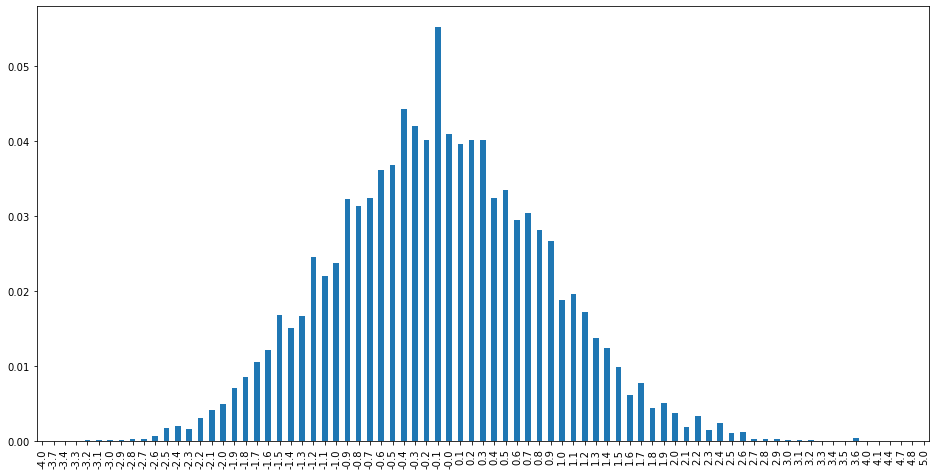

In [35]:
# predicted variance of HCP from 40
df_preds['HCP_sum_var'].astype('float').round(1).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(16,8))

<AxesSubplot:>

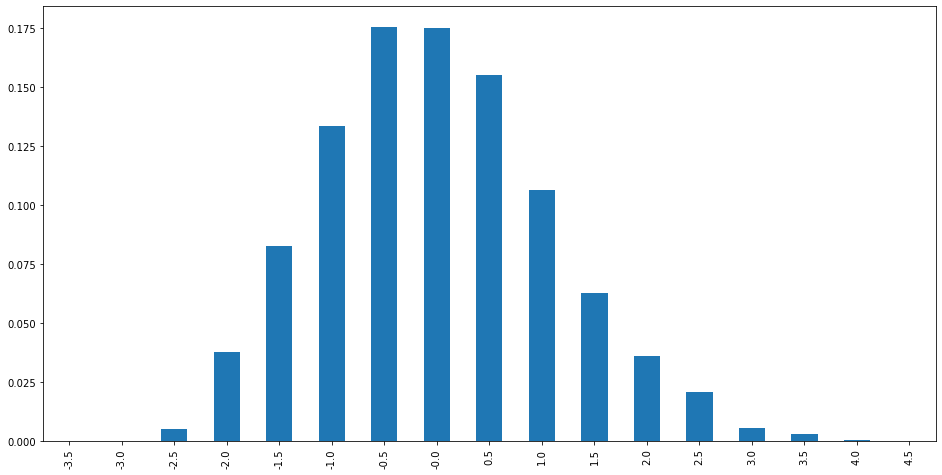

In [36]:
# predicted QT variance
df_preds['QT_S_var'].astype('float').div(5).round(1).mul(5).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(16,8))

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

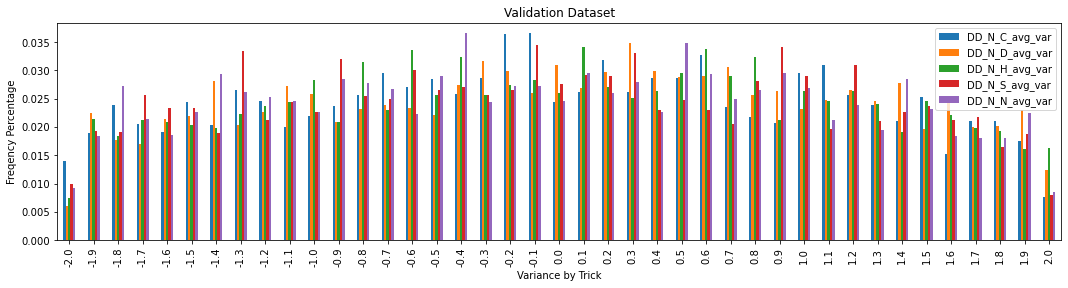

In [37]:
# plot variance .1 trick precision
plotd = {}
for n in [n for n in y_names if n.startswith('DD')]:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n+'_var'].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

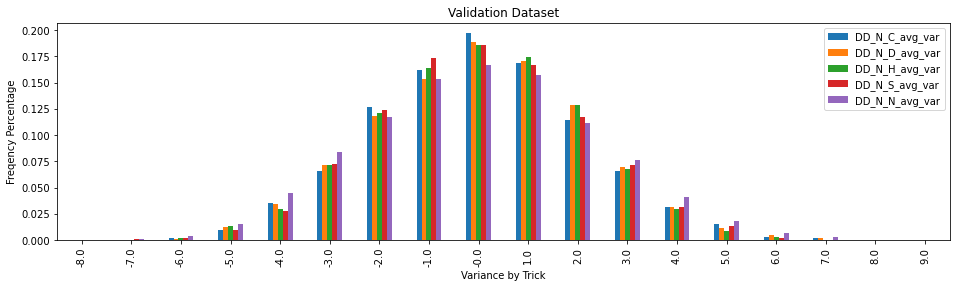

In [38]:
# plot variance 1 trick precision
plotd = {}
for n in [n for n in y_names if n.startswith('DD')]:
    plotd[n+'_var'] = df_preds[n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by HCP', ylabel='Frequency Percentage'>

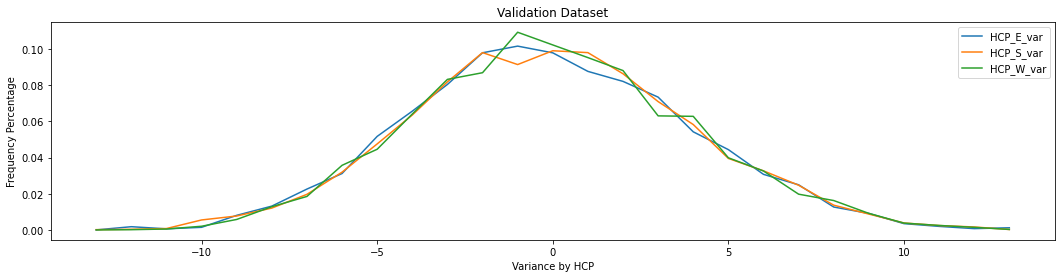

In [39]:
# plot variance .1 trick precision
plotd = {}
for n in [n for n in y_names if n.startswith('HCP')]:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n+'_var'].between(-13,13)].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(figsize=(18,4), xlabel='Variance by HCP', ylabel='Frequency Percentage', title='Validation Dataset')

In [40]:
testdf = test[cont_names+cat_names+dep_vars].copy()
# need to transform columns for inference too
for n in testdf:
    if pd.api.types.is_categorical_dtype(testdf[n]):
        testdf[n] = testdf[n].cat.codes

# current fastai/pytorch has a bug where bool is treated as object and thus erroring out.
for n in testdf:
    if pd.api.types.is_bool_dtype(testdf[n]):
        testdf[n] = testdf[n].astype('uint8')

In [41]:
testdf.dtypes

Vul_NS          uint8
Vul_EW          uint8
HCP_N            int8
HCP_N_S          int8
HCP_N_H          int8
HCP_N_D          int8
HCP_N_C          int8
QT_N_S        float32
QT_N_H        float32
QT_N_D        float32
QT_N_C        float32
SL_N_S           int8
SL_N_H           int8
SL_N_D           int8
SL_N_C           int8
NSA              int8
NSK              int8
NSQ              int8
NSJ              int8
NST              int8
NS9              int8
NS8              int8
NS7              int8
NS6              int8
NS5              int8
               ...   
NC7              int8
NC6              int8
NC5              int8
NC4              int8
NC3              int8
NC2              int8
SL_Max_NS        int8
SL_Max_EW        int8
DD_N_C_avg    float64
DD_N_D_avg    float64
DD_N_H_avg    float64
DD_N_S_avg    float64
DD_N_N_avg    float64
HCP_E            int8
HCP_S            int8
HCP_W            int8
QT_S          float32
QT_S_S        float32
QT_S_H        float32
QT_S_D    

In [42]:
# takes 10s
# get predictions for test (as opposed to validation) dataset
dl_test = learn.dls.test_dl(testdf, with_labels=True)
preds, actuals = learn.get_preds(dl=dl_test)
len(preds), len(actuals), preds, actuals

(267429,
 267429,
 tensor([[ 4.5623,  8.8829,  6.5839,  ...,  3.2667,  4.3928,  2.1822],
         [ 8.2276,  9.6808,  8.2028,  ...,  3.2014,  3.8120,  3.9130],
         [ 8.9444,  8.6773,  6.8031,  ...,  2.3432,  3.5537,  2.9375],
         ...,
         [ 8.6981,  4.3667,  5.7662,  ...,  3.0374,  2.4776,  4.2160],
         [ 4.1689,  5.8393,  3.8904,  ...,  3.2193,  4.1197,  3.2691],
         [ 9.5557, 10.9902,  8.6674,  ...,  2.9754,  4.0276,  3.6079]]),
 tensor([[ 6.0000, 11.5000,  9.0000,  ...,  1.0000,  4.0000,  3.0000],
         [ 7.0000, 12.0000,  8.0000,  ...,  6.0000,  1.0000,  4.0000],
         [ 3.5000,  5.0000,  4.0000,  ...,  2.0000,  3.0000,  3.0000],
         ...,
         [ 5.0000,  1.5000,  3.0000,  ...,  4.0000,  3.0000,  4.0000],
         [ 1.0000,  5.0000,  0.5000,  ...,  1.0000,  5.0000,  5.0000],
         [10.5000, 10.5000,  9.0000,  ...,  2.0000,  4.0000,  4.0000]]))

In [43]:
pd.concat([testdf[dep_vars],pd.DataFrame(preds,index=testdf.index)],axis='columns')

DD_N_C_avg  DD_N_D_avg  DD_N_H_avg  DD_N_S_avg  DD_N_N_avg  HCP_E  HCP_S  HCP_W  QT_S  QT_S_S  QT_S_H  QT_S_D  QT_S_C  SL_S_S  SL_S_H  SL_S_D  SL_S_C     0     1     2     3    4     5     6     7    8    9   10   11   12   13   14   15   16
6723           6.00       11.50        9.00        9.50        8.00     14     16      2  3.00    0.50    0.50    2.00    0.00       5       1       4       3  4.56  8.88  6.58  6.39 6.36  9.82 11.19  9.83 2.08 0.48 0.53 0.74 0.33 3.22 3.27 4.39 2.18
6724           7.00       12.00        8.00        7.00       12.00      5     13      6  2.50    0.50    1.50    0.00    0.50       2       6       1       4  8.23  9.68  8.20  5.82 8.24  7.95  8.65  7.96 1.45 0.18 0.35 0.41 0.49 2.07 3.20 3.81 3.91
6725           3.50        5.00        4.00        5.00        5.00     12      1     11  0.00    0.00    0.00    0.00    0.00       5       2       3       3  8.94  8.68  6.80 10.44 9.13  7.87  8.24  7.69 1.31 0.46 0.29 0.37 0.29 4.45 2.34 3.55 2.94
6726           9.00        7.00        9.50       11.00        9.50      4     13     10  3.00    2.00    1.00    0.00    0.00       4       4       3       2  7.09  5.41  8.04  9.02 7.31  8.70  9.18  8.77 1.58 0.50 0.45 0.21 0.42 3.98 3.52 2.14 3.32
6727           9.50        7.50        9.00        5.00        8.00     12     14      3  3.00    0.00    2.00    0.00    1.00       1       4       3       5  6.22  6.19  7.91  4.65 5.94 10.05 10.05 10.24 1.80 0.33 0.55 0.47 0.45 2.52 4.00 3.23 3.28
6728           2.00        4.00        7.50        2.50        3.00     16      7      9  1.00    0.00    1.00    0.00    0.00       3       4       5       1  3.34  5.76  7.83  5.54 5.01 10.97 10.14 11.06 1.83 0.46 0.60 0.46 0.29 3.26 4.28 3.34 2.23
6729           7.00        7.50        6.00        8.50        7.50      9      4      8  0.50    0.50    0.00    0.00    0.00       5       3       3       2  8.53  8.87  6.48 10.45 8.93  7.55  7.18  7.03 1.15 0.40 0.30 0.33 0.21 4.39 2.16 3.55 2.79
6730          11.00        9.50       11.50        8.50       10.50      7     14      7  3.00    0.00    1.50    1.00    0.50       0       5       5       3  7.13  6.78  8.61  5.56 6.99  8.91  8.01  9.16 1.28 0.24 0.43 0.32 0.30 2.58 3.98 3.18 3.18
6731           3.00        9.00        3.00        8.00        3.00     14     10      8  2.00    0.00    0.00    1.00    1.00       2       1       7       3  6.24  8.35  3.80  6.05 5.69 10.69 10.35 10.57 1.86 0.44 0.29 0.72 0.43 3.38 2.22 4.52 3.09
6732           9.00        3.00        5.00        5.00        4.00     14      2     10  0.00    0.00    0.00    0.00    0.00       2       5       3       3  9.94  5.37  7.82  7.81 7.95  8.33  9.24  8.43 1.64 0.38 0.42 0.25 0.55 3.34 3.43 2.20 4.21
6733           1.50        5.00        4.00        1.50        1.50     16      9     12  1.50    0.00    0.50    0.00    1.00       3       4       5       1  1.71  3.48  5.94  3.32 2.50 13.07 11.37 13.07 2.16 0.53 0.72 0.53 0.38 3.10 4.32 3.17 2.23
6734           5.00        8.00        7.50        6.50        6.50      8     13     12  3.00    0.00    1.00    1.50    0.50       4       2       6       1  4.13  8.05  5.64  5.27 5.25 11.02 12.33 11.06 2.37 0.54 0.58 0.85 0.39 3.20 3.24 4.59 2.19
6735           3.50        2.00        7.00        5.00        5.00      7      6     18  1.00    0.50    0.50    0.00    0.00       4       6       0       3  6.24  4.14  8.56  6.44 6.01 10.07 10.69 10.24 1.97 0.48 0.65 0.32 0.49 3.28 4.36 2.13 3.37
6736           7.00        3.50        5.50        8.00        6.50     14      8      6  1.00    0.00    1.00    0.00    0.00       4       4       1       4  7.06  5.50  8.14  9.04 7.38  8.68  9.75  8.73 1.72 0.53 0.49 0.23 0.47 3.93 3.55 2.09 3.40
6737          12.00        8.50       10.00       11.00       11.00      3     12     10  3.00    2.00    0.00    0.00    1.00       5       2       2       4 10.39  5.88  8.23  8.22 8.56  7.90  9.64  8.00 1.74 0.39 0.45 0.27 0.59 3.31 3.46 2.1

In [44]:
# takes 13s
# create dataframe with test predictions
df_preds = AppendPredictionsToDF(testdf, preds)
df_preds.sort_index(axis='columns', inplace=True)
display(len(df_preds), df_preds)

267429

DD_N_C_avg  DD_N_C_avg_pred  DD_N_C_avg_var  DD_N_D_avg  DD_N_D_avg_pred  DD_N_D_avg_var  DD_N_H_avg  DD_N_H_avg_pred  DD_N_H_avg_var  DD_N_N_avg  DD_N_N_avg_pred  DD_N_N_avg_var  DD_N_S_avg  DD_N_S_avg_pred  DD_N_S_avg_var  HCP_E  HCP_E_pred  HCP_E_var  HCP_N  HCP_N_C  HCP_N_D  HCP_N_H  HCP_N_S  HCP_S  HCP_S_pred  HCP_S_var  HCP_W  HCP_W_pred  HCP_W_var  NC2  NC3  NC4  NC5  NC6  NC7  NC8  NC9  NCA  NCJ  NCK  NCQ  NCT  ND2  ND3  ND4  ND5  ND6  ND7  ND8  ND9  NDA  NDJ  NDK  NDQ  NDT  NH2  NH3  NH4  NH5  NH6  NH7  NH8  NH9  NHA  NHJ  NHK  NHQ  NHT  NS2  NS3  NS4  NS5  NS6  NS7  NS8  NS9  NSA  NSJ  NSK  NSQ  NST  QT_N_C  QT_N_D  QT_N_H  QT_N_S  QT_S  QT_S_C  QT_S_C_pred  QT_S_C_var  QT_S_D  QT_S_D_pred  QT_S_D_var  QT_S_H  QT_S_H_pred  QT_S_H_var  QT_S_S  QT_S_S_pred  QT_S_S_var  QT_S_pred  QT_S_var  SL_Max_EW  SL_Max_NS  SL_N_C  SL_N_D  SL_N_H  SL_N_S  SL_S_C  SL_S_C_pred  SL_S_C_var  SL_S_D  SL_S_D_pred  SL_S_D_var  SL_S_H  SL_S_H_pred  SL_S_H_var  SL_S_S  SL_S_S_pred  SL_S_S_var  Vul_EW  Vul_NS
6723           6.00             4.56            1.44       11.50             8.88            2.62        9.00             6.58            2.42        8.00             6.36            1.64        9.50             6.39            3.11     14        9.82       4.18      8        0        0        4        4     16       11.19       4.81      2        9.83      -7.83    0    1    0    0    0    0    0    0    0    0    0    0    0    0    1    0    1    1    1    1    0    0    0    0    0    0    1    0    1    0    0    0    1    1    1    0    0    0    0    1    0    0    0    0    0    0    0    1    0    0    0    0    0.00    0.00    1.00    1.00  3.00    0.00         0.33       -0.33    2.00         0.74        1.26    0.50         0.53       -0.03    0.50         0.48        0.02       2.08      0.92          0          1       1       5       5       2       3         2.18        0.82       4         4.39       -0.39       1         3.27       -2.27       5         3.22        1.78       1       1
6724           7.00             8.23           -1.23       12.00             9.68            2.32        8.00             8.20           -0.20       12.00             8.24            3.76        7.00             5.82            1.18      5        7.95      -2.95     16        6       10        0        0     13        8.65       4.35      6        7.96      -1.96    0    0    0    0    0    0    0    0    1    0    0    1    0    1    0    1    0    0    1    1    0    1    1    1    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    1    0    0    0    0    0    0    1    1.50    2.00    0.00    0.00  2.50    0.50         0.49        0.01    0.00         0.41       -0.41    1.50         0.35        1.15    0.50         0.18        0.32       1.45      1.05          3          1       2       8       0       3       4         3.91        0.09       1         3.81       -2.81       6         3.20        2.80       2         2.07       -0.07       1       1
6725           3.50             8.94           -5.44        5.00             8.68           -3.68        4.00             6.80           -2.80        5.00             9.13           -4.13        5.00            10.44           -5.44     12        7.87       4.13     16        3        3        6        4      1        8.24      -7.24     11        7.69       3.31    1    0    0    0    0    1    0    0    0    0    1    0    0    0    1    0    1    0    0    0    1    0    0    1    0    0    0    1    0    0    0    0    0    0    0    1    1    1    0    0    0    1    0    0    0    0    0    1    0    0    0    0    0.50    0.50    1.00    1.00  0.00    0.00         0.29       -0.29    0.00         0.37       -0.37    0.00         0.29       -0.29    0.00         0.46       -0.46       1.31     -1.31          2          3       3       4       4       2       3         2.94        0.06       3         3.55       -0.55       2        

<AxesSubplot:title={'center':'Test Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

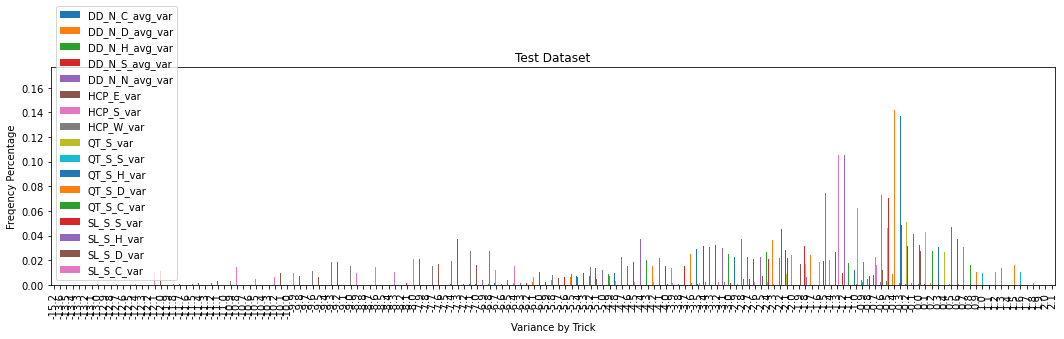

In [45]:
# plot with .1 trick precision
plotd = {}
for n in y_names:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Test Dataset')

<AxesSubplot:title={'center':'Test Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

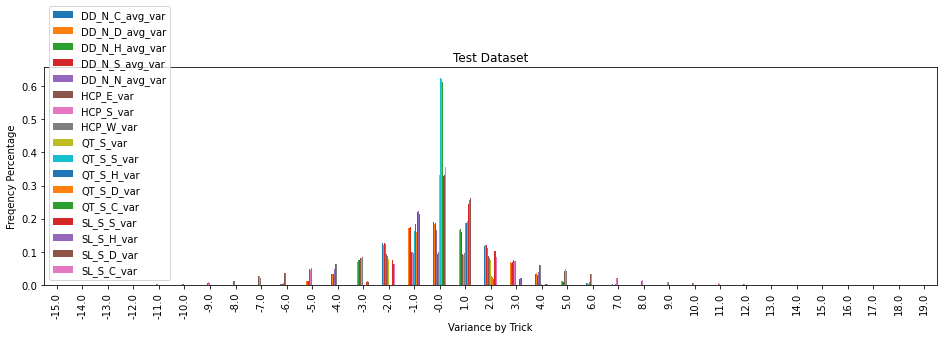

In [46]:
# plot with 1 trick precision
plotd = {}
for n in y_names:
    plotd[n+'_var'] = df_preds[n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Test Dataset')

In [47]:
# takes 2s
# get validation dataset predictions. Pass passing learn.dls.valid) instead of default ().
preds, actuals = learn.get_preds(dl=learn.dls.valid)
len(preds), len(actuals), preds, actuals

(85646,
 85646,
 tensor([[4.6088, 8.8753, 6.6416,  ..., 3.2854, 4.3686, 2.2019],
         [3.6207, 5.6289, 5.9296,  ..., 3.4035, 3.1842, 2.3405],
         [7.1908, 8.8820, 4.3385,  ..., 2.2536, 4.8300, 2.8367],
         ...,
         [5.5664, 3.3365, 7.9387,  ..., 4.3721, 2.1268, 3.2962],
         [4.6560, 3.3581, 5.7041,  ..., 3.5620, 1.9538, 3.5899],
         [5.7446, 3.5524, 7.8888,  ..., 4.3556, 2.3200, 3.2032]]),
 tensor([[4.5000, 6.0000, 3.0000,  ..., 4.0000, 3.0000, 1.0000],
         [7.0000, 7.5000, 7.5000,  ..., 5.0000, 5.0000, 0.0000],
         [5.0000, 7.0000, 3.5000,  ..., 2.0000, 6.0000, 1.0000],
         ...,
         [6.5000, 3.0000, 7.0000,  ..., 3.0000, 2.0000, 5.0000],
         [5.0000, 3.0000, 5.0000,  ..., 4.0000, 1.0000, 5.0000],
         [5.5000, 0.0000, 5.5000,  ..., 5.0000, 2.0000, 4.0000]]))

In [48]:
# takes 3s
# create dataframe from validation dataset
df_preds = AppendPredictionsToDF(df[augmented_df['Valid'].values], preds)
df_preds.sort_index(axis='columns', inplace=True)
display(len(df_preds), df_preds)

85646

DD_N_C_avg  DD_N_C_avg_pred  DD_N_C_avg_var  DD_N_D_avg  DD_N_D_avg_pred  DD_N_D_avg_var  DD_N_H_avg  DD_N_H_avg_pred  DD_N_H_avg_var  DD_N_N_avg  DD_N_N_avg_pred  DD_N_N_avg_var  DD_N_S_avg  DD_N_S_avg_pred  DD_N_S_avg_var  HCP_E  HCP_E_pred  HCP_E_var  HCP_N  HCP_N_C  HCP_N_D  HCP_N_H  HCP_N_S  HCP_S  HCP_S_pred  HCP_S_var  HCP_W  HCP_W_pred  HCP_W_var  NC2  NC3  NC4  NC5  NC6  NC7  NC8  NC9  NCA  NCJ  NCK  NCQ  NCT  ND2  ND3  ND4  ND5  ND6  ND7  ND8  ND9  NDA  NDJ  NDK  NDQ  NDT  NH2  NH3  NH4  NH5  NH6  NH7  NH8  NH9  NHA  NHJ  NHK  NHQ  NHT  NS2  NS3  NS4  NS5  NS6  NS7  NS8  NS9  NSA  NSJ  NSK  NSQ  NST  QT_N_C  QT_N_D  QT_N_H  QT_N_S  QT_S  QT_S_C  QT_S_C_pred  QT_S_C_var  QT_S_D  QT_S_D_pred  QT_S_D_var  QT_S_H  QT_S_H_pred  QT_S_H_var  QT_S_S  QT_S_S_pred  QT_S_S_var  QT_S_pred  QT_S_var  SL_Max_EW  SL_Max_NS  SL_N_C  SL_N_D  SL_N_H  SL_N_S  SL_S_C  SL_S_C_pred  SL_S_C_var  SL_S_D  SL_S_D_pred  SL_S_D_var  SL_S_H  SL_S_H_pred  SL_S_H_var  SL_S_S  SL_S_S_pred  SL_S_S_var  Vul_EW  Vul_NS
6363           4.50             4.61           -0.11        6.00             8.88           -2.88        3.00             6.64           -3.64        3.50             6.41           -2.91        4.50             6.45           -1.95     12        9.82       2.18      8        8        0        0        0      5       11.82      -6.82     15        9.84       5.16    0    0    0    0    0    0    0    0    1    1    1    0    1    1    0    1    1    0    0    1    1    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    1    0    0    1    0    0    0    0    1    0    0    0    0    0    2.00    0.00    0.00    0.00  1.00    0.00         0.37       -0.37    0.00         0.78       -0.78    0.00         0.57       -0.57    1.00         0.51        0.49       2.24     -1.24          0          1       4       5       2       2       1         2.20       -1.20       3         4.37       -1.37       4         3.29        0.71       5         3.24        1.76       1       1
6364           7.00             3.62            3.38        7.50             5.63            1.87        7.50             5.93            1.57        7.50             4.96            2.54       12.00             7.27            4.73      9       10.90      -1.90      7        2        0        0        5     16       11.36       4.64      8       10.77      -2.77    1    1    0    0    0    1    1    0    0    0    0    1    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    1    0    1    1    1    0    0    1    0.00    0.00    0.00    1.00  3.00    0.00         0.39       -0.39    1.50         0.53        0.97    1.00         0.58        0.42    0.50         0.64       -0.14       2.15      0.85          0          3       5       1       1       6       0         2.34       -2.34       5         3.18        1.82       5         3.40        1.60       3         4.00       -1.00       1       1
6365           5.00             7.19           -2.19        7.00             8.88           -1.88        3.50             4.34           -0.84        3.50             6.31           -2.81        4.00             5.90           -1.90     16        9.94       6.06      7        4        0        3        0      8       12.31      -4.31      9       10.00      -1.00    0    1    0    1    0    1    1    0    1    0    0    0    1    0    0    0    0    0    1    0    1    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    1    0    1    0    0    0    1    0    0    1    0    0    0    0    0    0    1.00    0.00    0.50    0.00  1.00    0.00         0.48       -0.48    0.00         0.93       -0.93    0.00         0.42       -0.42    1.00         0.55        0.45       2.35     -1.35          2          1       6       2       3       2       1         2.84       -1.84       6         4.83        1.17       2        

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

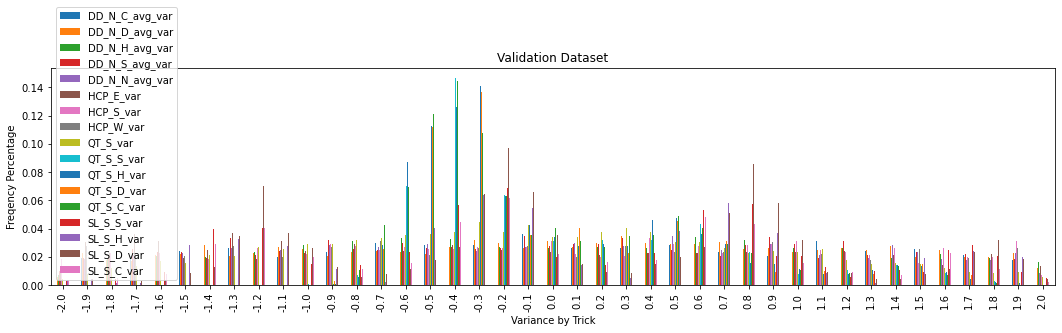

In [49]:
# plot dd variance using .1 trick precision
plotd = {}
for n in y_names:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n+'_var'].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

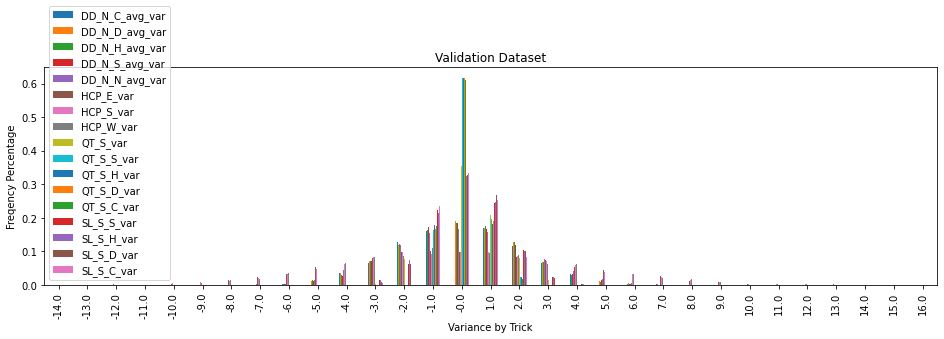

In [50]:
# plot dd variance using 1 trick precision
plotd = {}
for n in y_names:
    plotd[n+'_var'] = df_preds[n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

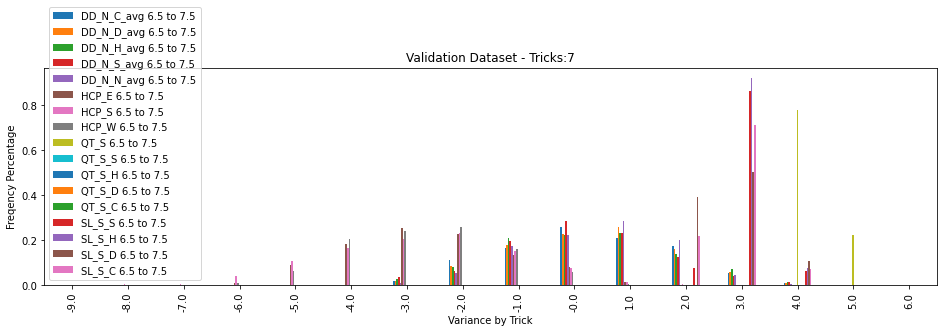

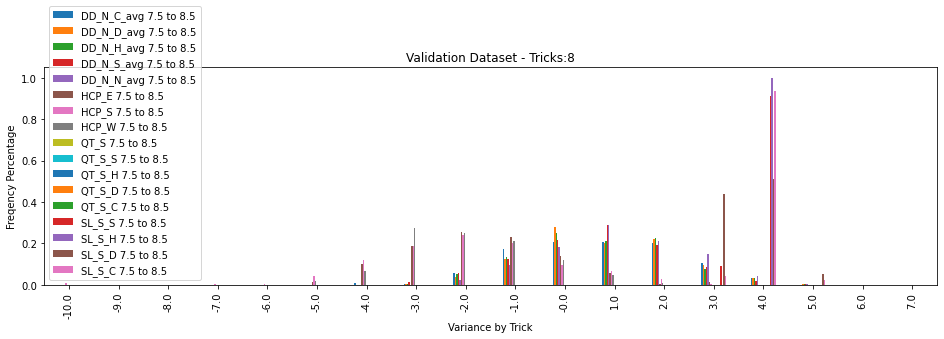

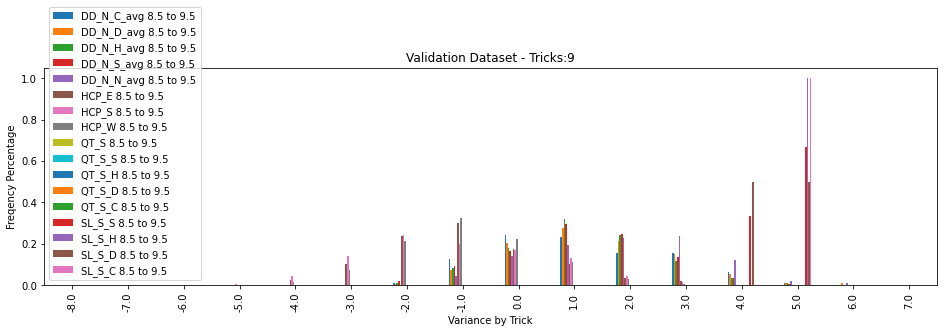

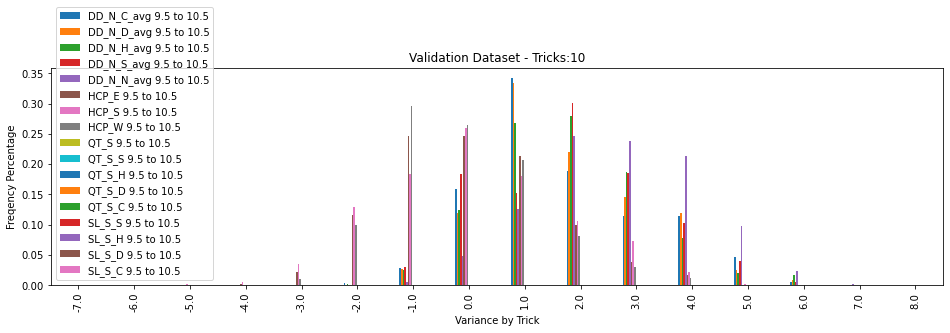

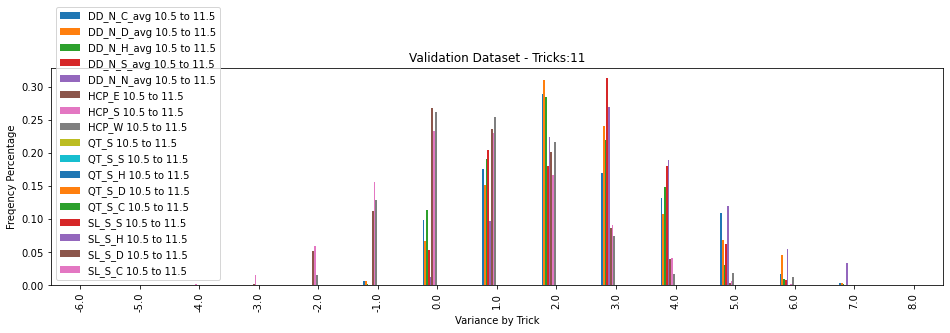

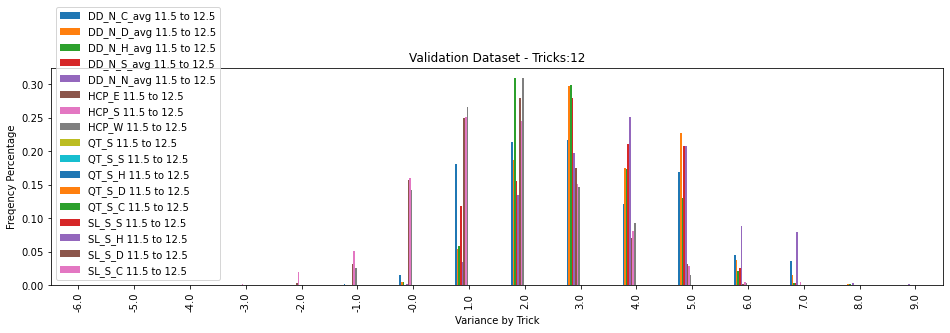

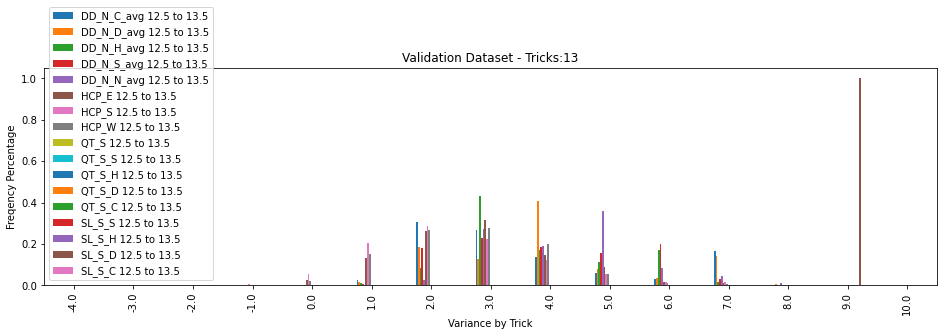

In [51]:
# plot dd variance, by trick count, using 1 trick precision
for t in range(6,13):
    plotd = {}
    for n in y_names:
        plotd[n+' '+str(t+.5)+' to '+str(t+1.5)] = df_preds[df_preds[n].between(t+.5,t+1.5,inclusive='left')][n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
    pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset - Tricks:'+str(t+1))

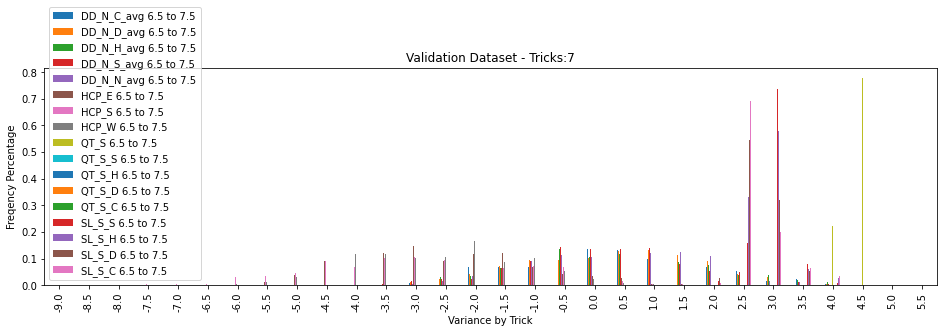

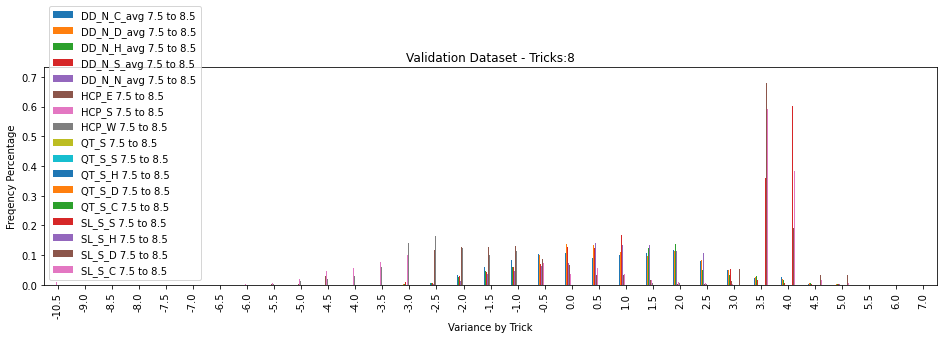

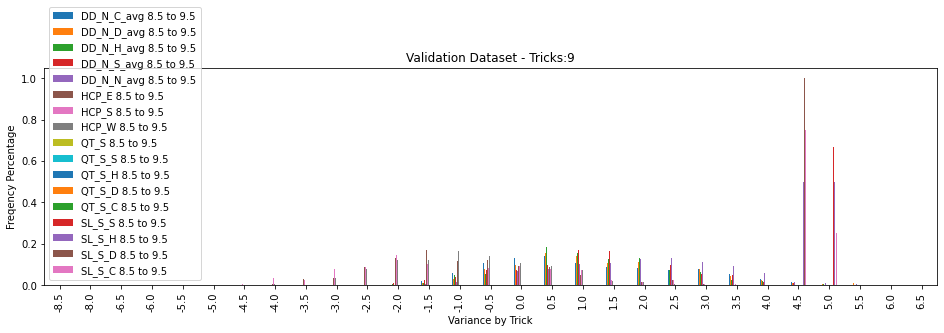

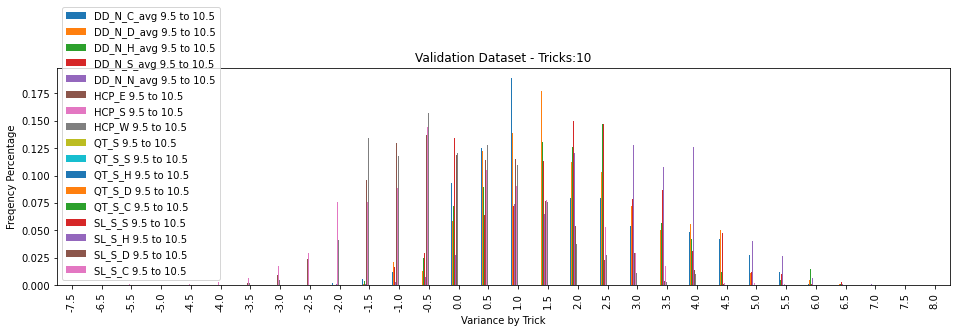

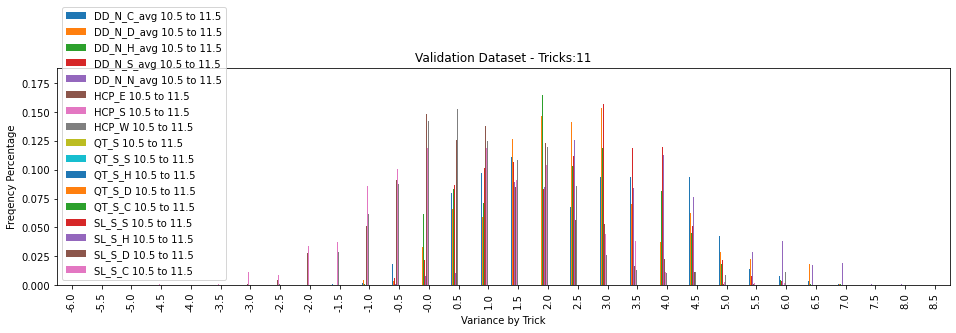

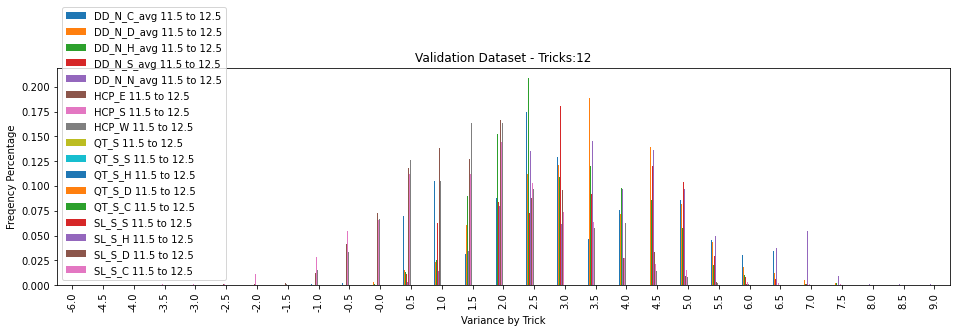

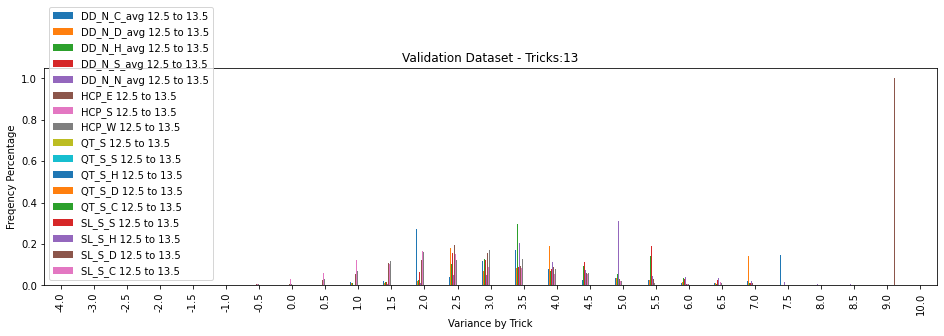

In [52]:
# plot dd variance, by trick count, using .5 trick precision
precision = .5
for t in range(6,13):
    plotd = {}
    for n in y_names:
        plotd[n+' '+str(t+.5)+' to '+str(t+1.5)] = df_preds[df_preds[n].between(t+.5,t+1.5,inclusive='left')][n+'_var'].astype('float').div(precision*10).round(1).mul(precision*10).value_counts(normalize=True).sort_index()
    pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset - Tricks:'+str(t+1))

In [53]:
#!pip install plotly-express
import plotly.express as px
# plot dd variance, by trick count, using .5 trick precision
precision = .5
for t in range(6,13):
    plotd = {}
    for n in y_names:
        plotd[n+' '+str(t+.5)+' to '+str(t+1.5)] = df_preds[df_preds[n].between(t+.5,t+1.5,inclusive='left')][n+'_var'].astype('float').div(precision*10).round(1).mul(precision*10).value_counts(normalize=True).sort_index()
    fig = px.bar(plotd, barmode='group', labels={'index':'Variance By Trick','value':'Frequency Percentage'}, title='Validation Dataset - Tricks:'+str(t+1))
    fig.show()

In [54]:
# takes forever
#!pip install pandas-profiling
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df_preds, title='NWSE Experiments')
#profile

In [55]:
# takes forever
#!pip install sweetviz
#import sweetviz as sv
#my_report = sv.analyze(df_preds)
#my_report.show_html()